# **Business Understanding**

## **Stakeholder**  
**Instituto Politécnico de Portalegre**  

## **Business Case**  
O objetivo é criar um modelo confiável utilizando técnicas de aprendizado de máquina para identificar estudantes que possam estar em risco de abandonar o ensino superior após a matrícula. Ao identificar esses estudantes precocemente, podemos implementar estratégias para apoiá-los e reduzir a probabilidade de desistência.  

O modelo foi treinado e testado com dados de estudantes do ensino superior em Portugal, mas também é relevante para faculdades e universidades nos Estados Unidos. Também enfrentamos o desafio de identificar estudantes em risco e fornecer intervenções para ajudá-los a se formar no tempo certo e ter sucesso nos estudos.  

> As taxas de conclusão dos graduandos nos Estados Unidos dentro de seis anos após a matrícula são de apenas **62,3%** em 2022.  
>  
> — Hanneh Bareham e Chelsea Wing (bankrate.com)  

Carnevale et al. (2021), da Universidade de Georgetown, destacaram em seu estudo a grande disparidade nos ganhos ao longo da vida com base no nível educacional. Em particular, o estudo mostrou que uma pessoa com apenas um diploma do ensino médio ou GED ganharia, em média, **1,6 milhão de dólares ao longo da vida**, em comparação com uma pessoa com diploma de bacharel, que poderia ganhar **~2,8 milhões de dólares**.  

Essa profunda disparidade no potencial de ganhos enfatiza o poder transformador do ensino superior e destaca a importância da conclusão oportuna dos estudos para aumentar a segurança financeira dos estudantes a longo prazo.  

---

# **Objetivos**  
Neste projeto, utilizarei o **pipeline OSEMiN** para:  

- **Obtain** → Importar os dados.  
- **Scrub** → Gerenciar os tipos de dados e resolver valores ausentes ou duplicados.  
- **Explore** → Identificar padrões nas relações entre as variáveis do conjunto de dados.  
- **Model** → Criar um conjunto de modelos preditivos.  
- **iNterpret** → Identificar insights e criar visualizações dos resultados.  

Para o nosso modelo, podemos priorizar:  

- **Acurácia** – proporção de rótulos corretamente previstos em relação ao total de amostras no conjunto de teste.  
- **Precisão** – mede a exatidão do modelo ao prever verdadeiros positivos como uma proporção de todos os positivos.  
- **Recall** – mede a capacidade do modelo de identificar corretamente todas as instâncias positivas.  
- **F1-score** – a média harmônica entre precisão e recall, usada quando queremos considerar tanto falsos positivos quanto falsos negativos.  

Neste projeto, priorizaremos **recall** em vez de precisão. Ao priorizar recall, buscamos reduzir o número de **falsos negativos** e aumentar a capacidade do modelo de identificar corretamente os estudantes em risco de fracasso acadêmico.  

Minimizar o número de falsos negativos ajudará a garantir que menos estudantes que precisam de assistência educacional passem despercebidos e não sejam devidamente identificados e apoiados.  

### **Definições Importantes**  

- **Verdadeiros Positivos (True Positives - TP)**: casos em que o modelo prevê corretamente instâncias positivas.  
  - Exemplo: estudantes previstos para desistir e que realmente desistem.  
- **Falsos Negativos (False Negatives - FN)**: casos em que o modelo prevê erroneamente instâncias negativas.  
  - Exemplo: estudantes previstos para desistir, mas que não desistem.  

A fórmula do **Recall** é dada por:  

$$ Recall =  \frac{True\ Positive}{True\ Positive + False\ Negative} $$  

Um **recall alto** significa que nosso modelo pode detectar efetivamente uma parte significativa dos estudantes propensos ao fracasso acadêmico.  

Crucialmente, determinar quais estudantes têm maior probabilidade de fracasso nos permite fornecer o suporte e os programas de intervenção necessários para aqueles que mais precisam.  

A fórmula da **Precisão (Precision)** é:  

$$ Precision =  \frac{True\ Positive}{True\ Positive + False\ Positive} $$  

Um **valor alto de precisão** indica que, quando o modelo prevê que um estudante está em risco, ele provavelmente enfrentará dificuldades acadêmicas.  

Essa característica é essencial, pois ajuda a evitar intervenções desnecessárias para estudantes que não precisam, garantindo uma alocação eficiente de recursos.  


# **Data Understanding**

O repositório de aprendizado de máquina da **Universidade da Califórnia (Irvine)** contém conjuntos de dados para avaliar técnicas de aprendizado de máquina. O conjunto de dados utilizado nesta exploração vem desse repositório e pode ser encontrado [aqui](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success).  


## **Descrição do Conjunto de Dados**  
Os dados incluem informações essenciais disponíveis no momento da matrícula do estudante, como:  

- **Caminho acadêmico**  
- **Demografia**  
- **Fatores socioeconômicos**  

### **Classificações de Estudantes**  
O conjunto de dados contém três classificações de estudantes:  

1. **Desistente (Dropout)**  
2. **Matriculado (Enrolled)**  
3. **Graduado (Graduate)**  

Os dados foram **pré-processados** para tratar valores ausentes e anomalias. O conjunto de dados contém **37 colunas** e **4424 registros**.  
---



# **Dados**
A classe UciDataSet define um construtor que permite acessar os dados do dataframe fornecido pela UCI. Ela fornece um método export_dataframe para carregar o conjunto de dados e exportá-lo para um objeto do tipo pd.DataFrame. O método print_metadata exibe os metadados do dataset em formato tabular, oferecendo informações como origem, propósito e outros aspectos importantes do conjunto de dados. Já o método print_variable_info permite visualizar informações detalhadas sobre as variáveis presentes no dataset, exibindo-as em uma tabela se estiverem no formato esperado.

Além disso, a classe implementa funcionalidades para exportar os dados em diferentes formatos. O método export_dataset exporta as features (X) e targets (y) separadamente para arquivos CSV, enquanto o método export_full_dataset exporta o dataset completo (features + targets) para um único arquivo CSV. Ambos os métodos oferecem mensagens de sucesso ou erro durante o processo de exportação.

Em resumo, a classe UciDataSet é uma ferramenta útil para acessar, manipular, visualizar e exportar datasets do repositório UCI relacionados ao abandono de estudantes e sucesso acadêmico.

# **Bibliotecas do projeto**

In [ ]:
#Dados Base
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [ ]:
from tabulate import tabulate

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from typing import Dict, List, Tuple, Optional

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
from pathlib import Path

In [ ]:
from abc import ABC, abstractmethod

In [ ]:
import logging

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from scipy import stats

# **Classes Importantes**

## UciDataSet

In [ ]:
# Carregamento dos Dados
class UciDataSet:
    """
    Classe para carregar, manipular e exportar o dataset do repositório UCI de previsão de abandono de estudantes e sucesso acadêmico.

    A classe utiliza a função `fetch_ucirepo` para buscar o dataset, separando as features, os targets, as variáveis e os metadados. Oferece métodos para exibir as informações do dataset e exportar os dados em diferentes formatos.
    """

    def __init__(self):
        """
        Construtor da classe UciDataSet. Carrega o dataset, as variáveis, e os metadados.

        Ao inicializar a classe, os seguintes atributos são configurados:
        - `self.X`: DataFrame com as features do dataset.
        - `self.y`: DataFrame com os targets do dataset.
        - `self.metadata`: Metadados sobre o dataset.
        - `self.variables`: Informações das variáveis do dataset.
        """
        # Fetch dataset
        self.predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

        # Data (as pandas dataframes)
        self.X = self.predict_students_dropout_and_academic_success.data.features
        self.y = self.predict_students_dropout_and_academic_success.data.targets

        # Metadata
        self.metadata = self.predict_students_dropout_and_academic_success.metadata
        self.variables = self.predict_students_dropout_and_academic_success.variables

    def print_metadata(self):
        """
        Exibe os metadados do dataset em formato tabular.

        Exibe uma tabela contendo as chaves e valores dos metadados para proporcionar uma visão geral
        do dataset, como informações sobre a origem, o propósito, entre outros aspectos do conjunto de dados.
        """
        print("\n=== Metadata ===\n")
        table = [[key, value] for key, value in self.metadata.items()]
        print(tabulate(table, headers=["Chave", "Valor"], tablefmt="grid"))

    def print_variable_info(self):
        """
        Exibe informações detalhadas sobre as variáveis do dataset.

        Se o dataset contiver as variáveis em formato DataFrame, ele será exibido como uma tabela.
        Caso contrário, será exibida uma mensagem indicando que o formato é inesperado.

        Verifique a estrutura de `self.variables` caso não seja exibido como esperado.
        """
        print("\n=== Informações das Variáveis ===\n")
        if isinstance(self.variables, pd.DataFrame):
            print(tabulate(self.variables, headers="keys", tablefmt="grid"))
        else:
            print("Formato inesperado das variáveis. Verifique a estrutura de `self.variables`.")

    def export_dataset(self, features_path='features.csv', targets_path='targets.csv'):
        """
        Exporta as features (X) e os targets (y) separadamente para arquivos CSV.

        Parâmetros:
        - features_path (str): Caminho para salvar o arquivo contendo as features. (Padrão: 'features.csv')
        - targets_path (str): Caminho para salvar o arquivo contendo os targets. (Padrão: 'targets.csv')

        Exibe mensagens de sucesso ou erro durante o processo de exportação.
        """
        try:
            self.X.to_csv(features_path, index=False)
            print(f"✅ Features exportadas para {features_path}")

            self.y.to_csv(targets_path, index=False)
            print(f"✅ Targets exportados para {targets_path}")
        except Exception as e:
            print(f"❌ Erro ao exportar o dataset: {e}")

    def export_full_dataset(self, path='full_dataset.csv'):
        """
        Exporta o dataset completo (features + targets) para um único arquivo CSV.

        Parâmetros:
        - path (str): Caminho para salvar o dataset completo. (Padrão: 'full_dataset.csv')

        Exibe mensagens de sucesso ou erro durante o processo de exportação.
        """
        try:
            df_full = pd.concat([self.X, self.y], axis=1)  # Junta features e targets
            df_full.to_csv(path, index=False)
            print(f"✅ Dataset completo exportado para {path}")
        except Exception as e:
            print(f"❌ Erro ao exportar o dataset completo: {e}")

    def export_dataframe(self):
        """
        Retorna o dataset completo (features + targets) como um DataFrame Pandas.

        Retorno:
        - DataFrame Pandas contendo todas as colunas do dataset, combinando as features e os targets.

        Exemplo:
        >>> df = dataset.export_dataframe()
        >>> df.head()
        """
        return pd.concat([self.X, self.y], axis=1)


## PlotConfig


A classe PlotConfig é uma classe abstrata que visa fornecer configurações de estilo e parâmetros padrão para plotagens em gráficos. Essa classe pode ser utilizada para criar uma base comum para a personalização visual de gráficos, garantindo consistência no estilo e configurações de tamanho, cores e eixos.

Atributos Principais
PLOT_SETTINGS:

Armazena as configurações gerais de plotagem, como o estilo do gráfico, a paleta de cores e o tamanho da figura.
Exemplo de configuração:
"style": "seaborn-v0_8": Define o estilo visual do gráfico utilizando a biblioteca seaborn.
"palette": "husl": Define a paleta de cores padrão.
"figure.figsize": (12, 8): Define o tamanho padrão da figura.
"figure.dpi": 100: Define a resolução da figura.
COLOR_SCHEMES:

Define diferentes esquemas de cores para gráficos, que são usados dependendo do tipo de visualização:
"correlation": Esquema de cores para gráficos de correlação (ex: coolwarm).
"risk": Esquema de cores para gráficos de risco (ex: YlOrRd).
"success": Esquema de cores para gráficos de sucesso (ex: RdYlGn).
"categorical": Esquema de cores para gráficos categóricos (ex: Set2).
FIGURE_SIZES:

Define tamanhos específicos de figura para diferentes tipos de gráficos.
Exemplo:
"default": (12, 8): Tamanho padrão da figura.
"correlation": (12, 8): Tamanho da figura para gráficos de correlação.
"distribution": (12, 6): Tamanho da figura para gráficos de distribuição.
"performance": (10, 6): Tamanho da figura para gráficos de desempenho.
Métodos
setup_plot_style():

Método abstrato que será responsável por configurar o estilo e parâmetros padrão de plotagem.
Este método deve ser implementado em subclasses para ajustar o estilo global dos gráficos conforme necessário.
get_figure_size(plot_type: str) -> Tuple[int, int]:

Retorna o tamanho recomendado da figura baseado no tipo de gráfico.
O tipo de gráfico é especificado pelo parâmetro plot_type, que pode ser, por exemplo, "correlation", "distribution", etc.
O método retorna uma tupla com a largura e altura da figura.
get_color_scheme(plot_type: str) -> str:

Retorna o esquema de cores recomendado para um tipo específico de gráfico.
O parâmetro plot_type define o tipo de gráfico, e o método retorna o nome do esquema de cores correspondente.
style_axis_labels(ax: plt.Axes, xlabel: str, ylabel: str, rotation: int = 0):

Aplica estilização consistente aos rótulos dos eixos do gráfico.
O método recebe os objetos de eixos do Matplotlib (ax), e os rótulos dos eixos X e Y.
O parâmetro rotation permite a rotação dos rótulos do eixo X, sendo útil para evitar sobreposição.
style_title(ax: plt.Axes, title: str):

Aplica estilização consistente ao título do gráfico.
Recebe o objeto de eixos e o título desejado para o gráfico.
Objetivo
A classe PlotConfig tem como objetivo fornecer uma estrutura base para a configuração e personalização de gráficos. Ao centralizar as configurações de estilo e parâmetros de plotagem, ela ajuda a manter a consistência visual em todos os gráficos, facilitando a criação de visualizações atrativas e profissionais. Essa abordagem também permite ajustes fáceis e rápidos em todos os gráficos de um projeto, como mudanças no tamanho da figura, esquema de cores ou estilo de rótulos.

In [ ]:
class PlotConfig:
    """Classe abstrata de configuração para plotagem."""

    def __init__(self):
        # Definir configurações básicas de plotagem
        self.PLOT_SETTINGS = {
            "style": "seaborn-v0_8",  # Estilo do gráfico
            "palette": "husl",  # Paleta de cores do gráfico
            "figure.figsize": (12, 8),  # Tamanho padrão da figura
            "figure.dpi": 100,  # DPI da figura
        }

        # Esquemas de cores para diferentes tipos de gráficos
        self.COLOR_SCHEMES = {
            "correlation": "coolwarm",
            "risk": "YlOrRd",
            "success": "RdYlGn",
            "categorical": "Set2",
        }

        # Tamanhos de figuras recomendados para tipos específicos de gráfico
        self.FIGURE_SIZES: Dict[str, Tuple[int, int]] = {
            "default": (12, 8),
            "correlation": (12, 8),
            "distribution": (12, 6),
            "categorical": (12, 5),
            "performance": (10, 6),
            "semester": (15, 10),
        }

    def setup_plot_style(self) -> None:
        """Configurar estilo padrão de gráficos e parâmetros."""
        # Definir o estilo do gráfico
        plt.style.use(self.PLOT_SETTINGS["style"])

        # Definir a paleta de cores
        sns.set_palette(self.PLOT_SETTINGS["palette"])

        # Definir tamanho padrão da figura e DPI
        plt.rcParams["figure.figsize"] = self.PLOT_SETTINGS["figure.figsize"]
        plt.rcParams["figure.dpi"] = self.PLOT_SETTINGS["figure.dpi"]


    def get_figure_size(self, plot_type: str) -> Tuple[int, int]:
        """
        Obter o tamanho recomendado da figura para um tipo específico de gráfico.

        Args:
            plot_type: Tipo do gráfico (e.g., 'correlation', 'distribution')

        Returns:
            Tuple contendo largura e altura em polegadas
        """
        return self.FIGURE_SIZES.get(plot_type, self.FIGURE_SIZES["default"])


    def get_color_scheme(self, plot_type: str) -> str:
        """
        Obter o esquema de cores recomendado para um tipo específico de gráfico.

        Args:
            plot_type: Tipo do gráfico (e.g., 'correlation', 'risk')

        Returns:
            Nome do esquema de cores
        """
        return self.COLOR_SCHEMES.get(plot_type, self.COLOR_SCHEMES["categorical"])


    # Funções de estilização comum
    def style_axis_labels(
        self, ax: plt.Axes, xlabel: str, ylabel: str, rotation: int = 0
    ) -> None:
        """
        Aplicar estilização consistente nos rótulos dos eixos.

        Args:
            ax: Objeto Axes do Matplotlib
            xlabel: Rótulo do eixo x
            ylabel: Rótulo do eixo y
            rotation: Ângulo de rotação dos rótulos do eixo x
        """
        ax.set_xlabel(xlabel, fontsize=10)
        ax.set_ylabel(ylabel, fontsize=10)
        if rotation != 0:
            plt.xticks(rotation=rotation)


    def style_title(self, ax: plt.Axes, title: str) -> None:
        """
        Aplicar estilização consistente no título do gráfico.

        Args:
            ax: Objeto Axes do Matplotlib
            title: Título do gráfico
        """
        ax.set_title(title, fontsize=12, pad=20)


## PlotUtils


A classe `PlotUtils` é uma classe utilitária para criar gráficos padronizados com base nas configurações definidas pela classe abstrata `PlotConfig`. Ela foi projetada para facilitar a criação de visualizações consistentes e estéticas de diferentes tipos de dados, como distribuições numéricas, distribuições categóricas, matrizes de correlação, entre outros.

### Métodos

#### `__init__(self, data: pd.DataFrame)`
Inicializa a classe com um DataFrame contendo os dados a serem plotados.

**Argumentos:**
- `data`: DataFrame contendo os dados para plotagem.

#### `plot_numeric_distribution(self, column: str, target_col: str = "Target", target_names: Optional[Dict[int, str]] = None)`
Cria gráficos de distribuição para características numéricas, como histogramas com estimativas de densidade (KDE) e boxplots por alvo.

**Argumentos:**
- `column`: Nome da coluna numérica a ser plotada.
- `target_col`: Nome da coluna de destino (opcional, padrão é "Target").
- `target_names`: Dicionário que mapeia os valores do alvo para nomes (opcional).

#### `plot_categorical_distribution(self, column: str, target_col: str = "Target", target_names: Optional[Dict[int, str]] = None)`
Cria gráficos de distribuição para características categóricas, incluindo gráficos de contagem de valores e gráficos de barras empilhadas por alvo.

**Argumentos:**
- `column`: Nome da coluna categórica a ser plotada.
- `target_col`: Nome da coluna de destino (opcional, padrão é "Target").
- `target_names`: Dicionário que mapeia os valores do alvo para nomes (opcional).

#### `plot_correlation_matrix(self, title: str = "Feature Correlations", figsize: Optional[Tuple[int, int]] = None)`
Cria o mapa de calor da matriz de correlação entre as variáveis numéricas.

**Argumentos:**
- `title`: Título do gráfico (opcional, padrão é "Feature Correlations").
- `figsize`: Tamanho opcional da figura (se não fornecido, usa o valor padrão de `PlotConfig`).

#### `plot_risk_distribution(self, risk_scores: pd.Series, risk_validation: pd.DataFrame, target_names: Dict[int, str])`
Cria gráficos de distribuição de risco, com histograma das pontuações de risco e uma visualização de risco versus resultados reais.

**Argumentos:**
- `risk_scores`: Série com as pontuações de risco.
- `risk_validation`: DataFrame com os resultados da validação de risco.
- `target_names`: Dicionário que mapeia os valores do alvo para nomes.

#### `save_plot(self, plot_path: Path, filename: str, dpi: int = 300, bbox_inches: str = "tight")`
Salva o gráfico gerado em um arquivo no diretório especificado.

**Argumentos:**
- `plot_path`: Caminho do diretório onde o gráfico será salvo.
- `filename`: Nome do arquivo onde o gráfico será salvo.
- `dpi`: Resolução do gráfico salvo (opcional, padrão é 300).
- `bbox_inches`: Parâmetro para definir o tipo de caixa delimitadora ao salvar o gráfico (opcional, padrão é "tight").

### Funcionamento Geral

A classe `PlotUtils` herda de `PlotConfig` e aproveita as configurações de estilo e tamanho de gráfico definidas nesta classe base. Ela utiliza o `matplotlib` e o `seaborn` para gerar gráficos, com um foco em gráficos esteticamente agradáveis e consistentes.

Cada método da classe é responsável por um tipo específico de visualização e os gráficos podem ser personalizados para incluir informações sobre um alvo ou categoria específica. Além disso, a classe oferece a funcionalidade de salvar as visualizações geradas diretamente em arquivos.


In [ ]:
class PlotUtils(PlotConfig):
    """Classe utilitária para criar gráficos padronizados."""

    def __init__(self, data: pd.DataFrame):
        """
        Inicializa a classe com um DataFrame.

        Args:
            data: DataFrame a ser usado para plotagem
        """
        super().__init__()
        self.data = data

    def plot_numeric_distribution(
        self,
        column: str,
        target_col: str = "Target",
        target_names: Optional[Dict[int, str]] = None,
    ) -> None:
        """
        Cria gráficos de distribuição para características numéricas.

        Args:
            column: Nome da coluna a ser plotada
            target_col: Nome da coluna do alvo
            target_names: Dicionário mapeando valores do alvo para nomes
        """
        plt.figure(figsize=self.get_figure_size("distribution"))

        # Histograma com KDE
        plt.subplot(1, 2, 1)
        sns.histplot(data=self.data, x=column, kde=True)
        self.style_title(plt.gca(), f"Distribuição de {column}")

        # Boxplot por alvo
        plt.subplot(1, 2, 2)
        sns.boxplot(data=self.data, x=target_col, y=column)
        if target_names:
            plt.xticks(range(len(target_names)), target_names.values())
        self.style_title(plt.gca(), f"{column} por Alvo")

        plt.tight_layout()
        plt.show()

    def plot_categorical_distribution(
        self,
        column: str,
        target_col: str = "Target",
        target_names: Optional[Dict[int, str]] = None,
    ) -> None:
        """
        Cria gráficos de distribuição para características categóricas.

        Args:
            column: Nome da coluna a ser plotada
            target_col: Nome da coluna do alvo
            target_names: Dicionário mapeando valores do alvo para nomes
        """
        plt.figure(figsize=self.get_figure_size("categorical"))

        # Gráfico de contagem de valores
        plt.subplot(1, 2, 1)
        value_counts = self.data[column].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        self.style_title(plt.gca(), f"Distribuição de {column}")
        self.style_axis_labels(plt.gca(), column, "Contagem", rotation=45)

        # Gráfico de barras empilhadas por alvo
        plt.subplot(1, 2, 2)
        contingency = pd.crosstab(self.data[column], self.data[target_col])
        contingency_pct = contingency.div(contingency.sum(axis=1), axis=0)
        contingency_pct.plot(kind="bar", stacked=True)
        if target_names:
            plt.legend(target_names.values())
        self.style_title(plt.gca(), f"{column} por Alvo")
        self.style_axis_labels(plt.gca(), column, "Proporção", rotation=45)

        plt.tight_layout()
        plt.show()

    def plot_correlation_matrix(
      self,
      title: str = "Feature Correlations",
      figsize: Optional[Tuple[int, int]] = None) -> None:
      """
      Cria o mapa de calor da matriz de correlação.

      Args:
          corr_matrix: Matriz de correlação
          title: Título do gráfico
          figsize: Sobrescrição opcional do tamanho da figura
      """
      # Calculando a matriz de correlação a partir dos dados
      corr_matrix = self.data.corr()

      # Criando o gráfico
      plt.figure(figsize=figsize or self.get_figure_size("correlation"))
      sns.heatmap(
          corr_matrix, annot=True, fmt=".2f", cmap=self.get_color_scheme("correlation")
      )
      self.style_title(plt.gca(), title)
      plt.tight_layout()
      plt.show()


    def plot_risk_distribution(
        self,
        risk_scores: pd.Series,
        risk_validation: pd.DataFrame,
        target_names: Dict[int, str],
    ) -> None:
        """
        Cria gráficos de distribuição de risco.

        Args:
            risk_scores: Série de pontuações de risco
            risk_validation: Resultados de validação de risco
            target_names: Dicionário mapeando valores do alvo para nomes
        """
        plt.figure(figsize=self.get_figure_size("distribution"))

        # Distribuição das pontuações de risco
        plt.subplot(1, 2, 1)
        sns.histplot(risk_scores, bins=20)
        self.style_title(plt.gca(), "Distribuição das Pontuações de Risco")

        # Níveis de risco por alvo
        plt.subplot(1, 2, 2)
        sns.heatmap(risk_validation, annot=True, fmt="d", cmap=self.get_color_scheme("risk"))
        self.style_title(plt.gca(), "Níveis de Risco vs Resultados Reais")
        plt.tight_layout()
        plt.show()

    def save_plot(
        self,
        plot_path: Path,
        filename: str,
        dpi: int = 300,
        bbox_inches: str = "tight"
    ) -> None:
        """
        Salva o gráfico atual em um arquivo.

        Args:
            plot_path: Caminho do diretório para salvar o gráfico
            filename: Nome do arquivo do gráfico
            dpi: Resolução do gráfico salvo
            bbox_inches: Parâmetro de caixa delimitadora para salvar
        """
        plot_path.mkdir(parents=True, exist_ok=True)
        plt.savefig(plot_path / filename, dpi=dpi, bbox_inches=bbox_inches)
        plt.close()

## ExploreData



A classe `ExploreData` herda da classe `PlotUtils` e é projetada para facilitar a exploração inicial e a limpeza de dados. Ela inclui métodos para examinar a estrutura do conjunto de dados, verificar a presença de placeholders, duplicatas e valores ausentes, além de fornecer funcionalidades para limpar os dados.

### Métodos

#### `__init__(self, data: pd.DataFrame)`
Construtor da classe `ExploreData`. Inicializa a classe com o conjunto de dados a ser explorado, que é passado como um DataFrame.

**Argumentos:**
- `data`: Conjunto de dados a ser explorado (pandas DataFrame).

#### `examine_structure(self)`
Imprime a estrutura do conjunto de dados, mostrando as dimensões (número de linhas e colunas), as primeiras linhas do DataFrame e informações detalhadas sobre o tipo de dados e valores presentes.

#### `check_placeholders(self)`
Verifica a presença de placeholders no conjunto de dados. Placeholders comuns como `?`, `#`, `NaN`, `null`, `N/A` e `-` são verificadas, e o método imprime um aviso caso algum placeholder seja encontrado.

#### `check_duplicates(self)`
Verifica a presença de duplicatas no DataFrame e exibe as linhas duplicadas, caso existam.

#### `check_missing_values(self)`
Verifica e exibe os valores ausentes (NaNs) presentes nas colunas do DataFrame, retornando a quantidade de valores ausentes por coluna.

#### `clean_na(self, fill_value=None)`
Realiza a limpeza dos dados, removendo ou preenchendo os valores ausentes (NaNs). Se o parâmetro `fill_value` for fornecido, os valores ausentes são preenchidos com o valor especificado; caso contrário, as linhas com valores ausentes são removidas.

**Argumentos:**
- `fill_value`: Valor para preencher os NaNs (opcional, por padrão, `None` remove as linhas com valores ausentes).

**Retorna:**
- `pandas.DataFrame`: DataFrame limpo, com os valores ausentes removidos ou preenchidos.

### Funcionamento Geral

A classe `ExploreData` permite realizar uma análise exploratória inicial do conjunto de dados, identificando problemas comuns como placeholders, duplicatas e valores ausentes. Além disso, oferece métodos para limpar e pré-processar os dados antes de utilizá-los em análises ou modelos. A herança da classe `PlotUtils` também permite a criação de gráficos e visualizações úteis durante a exploração de dados.

In [ ]:
class ExploreData(PlotUtils):
    def __init__(self, data: pd.DataFrame):
        """
        Construtor da classe ExploreData.

        Parâmetros:
        - data (pandas DataFrame): O conjunto de dados a ser explorado.
        """
        super().__init__(data)  # Chama o construtor da classe pai (PlotUtils)

    def examine_structure(self):
        """
        Imprime a estrutura do conjunto de dados e exibe as primeiras linhas.
        Também exibe informações sobre os dados, incluindo o número de linhas e colunas.
        """
        print('Estrutura dos Dados:')
        print(self.data.shape)

        print('\nPrimeiras Linhas dos Dados:')
        print(self.data.head())

        print('\nInformações dos Dados:')
        print(self.data.info())

    def check_placeholders(self):
        """
        Verifica e exibe a presença de placeholders ao longo de todo o dataframe.
        Placeholders verificados: '?', '#', 'NaN', 'null', 'N/A', '-'.
        """
        placeholders = ['?', '#', 'NaN', 'null', 'N/A', '-']
        placeholder_mask = self.data.isin(placeholders)

        if placeholder_mask.any().any():
            print('\nPlaceholders Detectados:')
            print(placeholder_mask)
        else:
            print('\nNenhum Placeholder Detectado.')

    def check_duplicates(self):
        """
        Verifica e exibe a presença de duplicatas no dataframe.
        """
        duplicates = self.data[self.data.duplicated()]

        if not duplicates.empty:
            print('\nDuplicatas Encontradas:')
            print(duplicates)
        else:
            print('\nNenhuma Duplicata Encontrada.')

    def check_missing_values(self):
        """
        Verifica e exibe a presença de valores ausentes no dataframe.
        """
        missing_values = self.data.isnull().sum()

        if missing_values.any():
            print('\nValores Ausentes Encontrados:')
            print(missing_values)
        else:
            print('\nNenhum Valor Ausente Encontrado.')

    def clean_na(self, fill_value=None):
        """
        Realiza operações de limpeza de dados.

        Neste método, as linhas com dados ausentes podem ser removidas
        ou preenchidas com o valor passado como parâmetro.

        Parâmetros:
        - fill_value: Valor para preencher os NaNs (por padrão, None remove as linhas)

        Returns:
            pandas.DataFrame: DataFrame limpo
        """
        if fill_value is None:
            cleaned_data = self.data.dropna()
        else:
            cleaned_data = self.data.fillna(fill_value)

        return cleaned_data

## CorrelationAnalyzer



A classe `CorrelationAnalyzer` é responsável por analisar as correlações e associações entre as características (features) de um conjunto de dados. Ela é especialmente útil para identificar relações significativas entre as variáveis numéricas e categóricas, utilizando métodos como a matriz de correlação para variáveis numéricas e o teste qui-quadrado para variáveis categóricas.

### Métodos

#### `__init__(self, df: pd.DataFrame, numeric_features: List[str], categorical_features: List[str])`
Construtor da classe `CorrelationAnalyzer`. Inicializa o analisador com o conjunto de dados (DataFrame) e listas de características numéricas e categóricas.

**Argumentos:**
- `df`: DataFrame contendo os dados a serem analisados.
- `numeric_features`: Lista de nomes das características numéricas.
- `categorical_features`: Lista de nomes das características categóricas.

#### `analyze_correlations(self) -> Dict`
Método principal para realizar a análise de correlações. Ele realiza a análise tanto para as variáveis numéricas (calculando a matriz de correlação) quanto para as variáveis categóricas (usando o teste qui-quadrado).

**Retorna:**
- Um dicionário com os resultados da análise de correlação, incluindo correlações significativas e associações entre características categóricas.

#### `_analyze_numeric_correlations(self) -> Dict`
Realiza a análise das correlações entre as características numéricas, calculando a matriz de correlação e identificando pares de variáveis com correlação significativa, com base no limiar definido (`correlation_threshold`).

**Retorna:**
- Um dicionário contendo as correlações significativas entre as características numéricas.

#### `_analyze_categorical_associations(self) -> Dict`
Analisa as associações entre as características categóricas usando o teste qui-quadrado, identificando associações significativas com base no valor `p` (se for menor que o limiar definido, `significance_threshold`).

**Retorna:**
- Um dicionário contendo as associações significativas entre as características categóricas.

#### `_plot_correlation_matrix(self, corr_matrix: pd.DataFrame) -> None`
Plota uma matriz de correlação utilizando o seaborn para visualizar as correlações entre as características numéricas do DataFrame.

**Argumentos:**
- `corr_matrix`: Matriz de correlação a ser visualizada.

#### `get_feature_correlations(self, feature: str) -> Dict[str, float]`
Obtém as correlações para uma característica específica com todas as outras características numéricas. As correlações abaixo do limiar de significância (`correlation_threshold`) são descartadas.

**Argumentos:**
- `feature`: Nome da característica para a qual as correlações serão analisadas.

**Retorna:**
- Um dicionário com as correlações da característica especificada com todas as outras características numéricas.

### Funcionamento Geral

A classe `CorrelationAnalyzer` permite realizar uma análise de correlações entre as características de um conjunto de dados, tanto para variáveis numéricas quanto categóricas. Ela calcula a matriz de correlação para variáveis numéricas e utiliza o teste qui-quadrado para variáveis categóricas, ajudando a identificar relações significativas entre as variáveis. Além disso, oferece funcionalidades para visualizar as correlações por meio de um gráfico de calor e permite a análise específica de uma característica com relação às outras características numéricas.

In [ ]:
class CorrelationAnalyzer:
    """Analyzes correlations and relationships between features."""

    def __init__(
        self,
        df: pd.DataFrame,
        numeric_features: List[str],
        categorical_features: List[str],
    ):
        # Configuração do logger
        self.logger = logging.getLogger("StudentAnalyzer")

        """
        Initialize the analyzer with dataset and feature lists.

        Args:
            df: Input DataFrame
            numeric_features: List of numeric feature names
            categorical_features: List of categorical feature names
        """
        self.df = df
        self.numeric_features = numeric_features
        self.categorical_features = categorical_features
        self.correlation_threshold = 0.5
        self.significance_threshold = 0.05

    def analyze_correlations(self) -> Dict:
        """
        Analyze correlations between features and identify significant relationships.

        Returns:
            Dict: Correlation analysis results including significant correlations
                 and categorical associations
        """
        self.logger.info("Starting correlation analysis")
        correlation_analysis = {}

        try:
            # Analyze numeric correlations
            numeric_correlations = self._analyze_numeric_correlations()
            if numeric_correlations:
                correlation_analysis["significant_correlations"] = numeric_correlations

            # Analyze categorical associations
            categorical_associations = self._analyze_categorical_associations()
            if categorical_associations:
                correlation_analysis["categorical_associations"] = (
                    categorical_associations
                )

            self.logger.info("Correlation analysis completed")
            return correlation_analysis

        except Exception as e:
            self.logger.error(f"Error in correlation analysis: {str(e)}")
            return {}

    def _analyze_numeric_correlations(self) -> Dict:
        """
        Analyze correlations between numeric features.

        Returns:
            Dict: Significant correlations between numeric features
        """
        self.logger.debug("Analyzing numeric correlations")
        significant_corr = {}

        try:
            # Calculate correlation matrix
            numeric_corr = self.df[self.numeric_features].corr()

            # Plot correlation heatmap
            self._plot_correlation_matrix(numeric_corr)

            # Store significant correlations
            for i in range(len(numeric_corr.columns)):
                for j in range(i + 1, len(numeric_corr.columns)):
                    corr_value = numeric_corr.iloc[i, j]
                    if abs(corr_value) > self.correlation_threshold:
                        feature_pair = (
                            f"{numeric_corr.columns[i]}_{numeric_corr.columns[j]}"
                        )
                        significant_corr[feature_pair] = {
                            "correlation": float(corr_value)
                        }

            return significant_corr

        except Exception as e:
            self.logger.error(f"Error in numeric correlation analysis: {str(e)}")
            return {}

    def _analyze_categorical_associations(self) -> Dict:
        """
        Analyze associations between categorical features using chi-square tests.

        Returns:
            Dict: Significant associations between categorical features
        """
        self.logger.debug("Analyzing categorical associations")
        categorical_associations = {}

        try:
            for col1 in self.categorical_features:
                for col2 in self.categorical_features:
                    if col1 < col2:  # Avoid duplicate combinations
                        contingency = pd.crosstab(self.df[col1], self.df[col2])
                        chi2, p_value = stats.chi2_contingency(contingency)[:2]

                        if p_value < self.significance_threshold:
                            feature_pair = f"{col1}_{col2}"
                            categorical_associations[feature_pair] = {
                                "chi2": float(chi2),
                                "p_value": float(p_value),
                            }

            return categorical_associations

        except Exception as e:
            self.logger.error(f"Error in categorical association analysis: {str(e)}")
            return {}

    def _plot_correlation_matrix(self, corr_matrix: pd.DataFrame) -> None:
        """
        Plot correlation matrix heatmap.

        Args:
            corr_matrix: Correlation matrix to visualize
        """
        plt.figure(figsize=(12, 8))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
        plt.title("Feature Correlations")
        plt.tight_layout()
        plt.show()

    def get_feature_correlations(self, feature: str) -> Dict[str, float]:
        """
        Get correlations for a specific feature with all other numeric features.

        Args:
            feature: Feature name to analyze

        Returns:
            Dict: Correlations with other features
        """
        if feature not in self.numeric_features:
            self.logger.warning(f"Feature {feature} not found in numeric features")
            return {}

        correlations = {}
        for other_feature in self.numeric_features:
            if other_feature != feature:
                corr = self.df[feature].corr(self.df[other_feature])
                if abs(corr) > self.correlation_threshold:
                    correlations[other_feature] = float(corr)

        return correlations

## FeatureAnalyzer

A classe `FeatureAnalyzer` é responsável por analisar e visualizar as distribuições das características (features) de um conjunto de dados. Ela permite a análise das distribuições das variáveis numéricas e categóricas, incluindo visualizações gráficas para facilitar a compreensão dos dados. Além disso, a classe realiza testes estatísticos para associar variáveis categóricas com o alvo (target).

### Métodos

#### `__init__(self, df: pd.DataFrame, numeric_features: List[str], categorical_features: List[str], target_names: Dict[int, str])`
Construtor da classe `FeatureAnalyzer`. Inicializa o analisador com o conjunto de dados, as listas de características numéricas e categóricas, além de um mapeamento para os valores de destino (target).

**Argumentos:**
- `df`: DataFrame contendo os dados a serem analisados.
- `numeric_features`: Lista de nomes das características numéricas.
- `categorical_features`: Lista de nomes das características categóricas.
- `target_names`: Dicionário que mapeia os valores de destino (target) para seus nomes correspondentes.

#### `analyze_feature_distributions(self) -> Dict`
Método principal para realizar a análise das distribuições de todas as características. Ele calcula as estatísticas descritivas para variáveis numéricas e categóricas e gera visualizações dessas distribuições.

**Retorna:**
- Um dicionário contendo as estatísticas das distribuições de todas as características.

#### `_analyze_numeric_features(self) -> Dict`
Realiza a análise das distribuições das características numéricas, calculando estatísticas como média, mediana, desvio padrão, assimetria, curtose e quantis. Também gera gráficos de distribuição para cada variável numérica.

**Retorna:**
- Um dicionário contendo as estatísticas das distribuições das variáveis numéricas.

#### `_analyze_categorical_features(self) -> Dict`
Realiza a análise das distribuições das características categóricas, calculando as frequências relativas e o valor modal (valor mais frequente). Também realiza o teste qui-quadrado entre cada variável categórica e a variável alvo (target) para verificar associações significativas.

**Retorna:**
- Um dicionário contendo as estatísticas das distribuições das variáveis categóricas, incluindo frequências, valor modal, número de valores únicos e os resultados do teste qui-quadrado.

#### `_plot_numeric_feature(self, col: str) -> None`
Cria gráficos de distribuição para as variáveis numéricas. A visualização inclui um histograma com a estimativa de densidade (KDE) e um boxplot que mostra a distribuição da variável em relação ao alvo (target).

**Argumentos:**
- `col`: Nome da variável numérica para a qual o gráfico será gerado.

#### `_plot_categorical_feature(self, col: str, value_counts: pd.Series, contingency: pd.DataFrame) -> None`
Cria gráficos de distribuição para as variáveis categóricas. A visualização inclui um gráfico de barras das frequências dos valores e um gráfico de barras empilhadas para mostrar a relação da variável categórica com o alvo (target).

**Argumentos:**
- `col`: Nome da variável categórica para a qual o gráfico será gerado.
- `value_counts`: Contagem de valores para a variável categórica.
- `contingency`: Tabela de contingência com a variável categórica e o alvo (target).

### Funcionamento Geral

A classe `FeatureAnalyzer` é usada para analisar as distribuições de características de um conjunto de dados e visualizar essas distribuições. Para variáveis numéricas, ela calcula estatísticas como média, mediana e desvio padrão, além de gerar gráficos como histogramas e boxplots. Para variáveis categóricas, a classe calcula as frequências dos valores e realiza o teste qui-quadrado para verificar associações significativas com o alvo (target). A classe também gera gráficos de barras para visualizar a distribuição de variáveis categóricas.

In [ ]:
class FeatureAnalyzer:
    """Analyzes and visualizes feature distributions and relationships."""

    def __init__(
        self,
        df: pd.DataFrame,
        numeric_features: List[str],
        categorical_features: List[str],
        target_names: Dict[int, str],
    ):
        """
        Initialize the analyzer with dataset and feature lists.

        Args:
            df: Input DataFrame
            numeric_features: List of numeric feature names
            categorical_features: List of categorical feature names
            target_names: Mapping of target values to their names
        """
        # Configuração do logger
        self.logger = logging.getLogger("FeatureAnalyzer")
        logging.basicConfig(level=logging.DEBUG)

        self.df = df
        self.numeric_features = numeric_features
        self.categorical_features = categorical_features
        self.target_names = target_names

    def analyze_feature_distributions(self) -> Dict:
        """
        Analyze and visualize the distribution of all features.

        Returns:
            Dict: Distribution statistics for all features
        """
        self.logger.info("Starting feature distribution analysis")
        distribution_stats = {}

        try:
            # Analyze numeric features
            distribution_stats.update(self._analyze_numeric_features())

            # Analyze categorical features
            distribution_stats.update(self._analyze_categorical_features())

            self.logger.info("Feature distribution analysis completed")
            return distribution_stats

        except Exception as e:
            self.logger.error(f"Error in feature distribution analysis: {str(e)}")
            return {}

    def _analyze_numeric_features(self) -> Dict:
        """Analyze numeric feature distributions."""
        stats = {}

        for col in self.numeric_features:
            self.logger.debug(f"Analyzing distribution of numeric feature: {col}")

            # Calculate statistics
            stats[col] = {
                "mean": float(self.df[col].mean()),
                "median": float(self.df[col].median()),
                "std": float(self.df[col].std()),
                "skew": float(self.df[col].skew()),
                "kurtosis": float(self.df[col].kurtosis()),
                "quantiles": self.df[col].quantile([0.25, 0.5, 0.75]).to_dict(),
            }

            # Visualize distribution
            self._plot_numeric_feature(col)

        return stats

    def _analyze_categorical_features(self) -> Dict:
        """Analyze categorical feature distributions."""
        stats = {}

        for col in self.categorical_features:
            if col != "Target":
                self.logger.debug(f"Analyzing distribution of categorical feature: {col}")

                # Calculate frequencies
                value_counts = self.df[col].value_counts()
                frequencies = (value_counts / len(self.df) * 100).round(2)

                # Create contingency table with target
                contingency = pd.crosstab(self.df[col], self.df["Target"])
                chi2, p_value = stats.chi2_contingency(contingency)[:2]

                stats[col] = {
                    "frequencies": frequencies.to_dict(),
                    "modal_category": value_counts.index[0],
                    "unique_values": self.df[col].nunique(),
                    "chi2_with_target": float(chi2),
                    "p_value_with_target": float(p_value),
                }

                # Visualize distribution
                self._plot_categorical_feature(col, value_counts, contingency)

        return stats

    def _plot_numeric_feature(self, col: str) -> None:
        """
        Create distribution plots for numeric features.

        Args:
            col: Feature name to plot
        """
        plt.figure(figsize=(12, 6))

        # Create subplot with histogram and KDE
        plt.subplot(1, 2, 1)
        sns.histplot(data=self.df, x=col, kde=True)
        plt.title(f"Distribution of {col}")

        # Create boxplot by target
        plt.subplot(1, 2, 2)
        sns.boxplot(data=self.df, x="Target", y=col)
        plt.title(f"{col} by Target")
        plt.xticks(range(len(self.target_names)), self.target_names.values())

        plt.tight_layout()
        plt.show()

    def _plot_categorical_feature(
        self, col: str, value_counts: pd.Series, contingency: pd.DataFrame
    ) -> None:
        """
        Create distribution plots for categorical features.

        Args:
            col: Feature name to plot
            value_counts: Value counts for the feature
            contingency: Contingency table with target
        """
        plt.figure(figsize=(12, 5))

        # Create frequency plot
        plt.subplot(1, 2, 1)
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)

        # Create stacked bar plot with target
        plt.subplot(1, 2, 2)
        contingency_pct = contingency.div(contingency.sum(axis=1), axis=0)
        contingency_pct.plot(kind="bar", stacked=True)
        plt.title(f"{col} by Target")
        plt.legend(self.target_names.values())
        plt.tight_layout()
        plt.show()


## PerformanceAnalyzer


In [ ]:
class PerformanceAnalyzer:
    """Analyzes academic performance patterns and progression."""

    def __init__(self, df: pd.DataFrame):
        """
        Initialize the analyzer with dataset.

        Args:
            df: Input DataFrame with academic performance data
        """
        # Configuração do logger
        self.logger = logging.getLogger("PerformanceAnalyzer")
        logging.basicConfig(level=logging.DEBUG)

        self.df = df
        self.demographic_cols = ["Gender", "Age at enrollment", "Scholarship holder"]

    def analyze_academic_performance(self) -> Dict:
        """
        Analyze academic performance patterns including grades and progression.

        Returns:
            Dict: Comprehensive academic performance statistics and patterns
        """
        self.logger.info("Starting academic performance analysis")
        performance_stats = {}

        try:
            # Analyze admission grades if available
            if "Admission grade" in self.df.columns:
                performance_stats.update(self._analyze_admission_grades())

            # Analyze semester performance
            semester_stats = self._analyze_semester_performance()
            if semester_stats:
                performance_stats["semester_success_rates"] = semester_stats

            # Analyze performance by demographics
            demographic_stats = self._analyze_demographic_performance()
            if demographic_stats:
                performance_stats.update(demographic_stats)

            self.logger.info("Academic performance analysis completed")
            return performance_stats

        except Exception as e:
            self.logger.error(f"Error in academic performance analysis: {str(e)}")
            return {}

    def _analyze_admission_grades(self) -> Dict:
        """Analyze admission grade distribution."""
        self.logger.debug("Analyzing admission grade distribution")

        stats = {
            "admission_grades": {
                "mean": self.df["Admission grade"].mean(),
                "median": self.df["Admission grade"].median(),
                "std": self.df["Admission grade"].std(),
                "quantiles": self.df["Admission grade"]
                .quantile([0.25, 0.5, 0.75])
                .to_dict(),
            }
        }

        # Visualize grade distribution by outcome
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=self.df, x="Target", y="Admission grade")
        plt.title("Admission Grades by Student Outcome")
        plt.xlabel("Student Outcome")
        plt.ylabel("Admission Grade")
        plt.xticks(range(3), ["Dropout", "Graduate", "Enrolled"])
        plt.tight_layout()
        plt.show()

        return stats

    def _analyze_semester_performance(self) -> Dict:
        """Analyze performance patterns across semesters."""
        success_rates = {}
        semester_cols = [col for col in self.df.columns if "sem" in col.lower()]

        if not semester_cols:
            return {}

        self.logger.debug("Analyzing semester performance")

        # Calculate semester-wise success rates
        for sem in range(1, len(semester_cols) // 2 + 1):
            enrolled_col = f"Curricular units {sem}st sem (enrolled)"
            approved_col = f"Curricular units {sem}st sem (approved)"

            if enrolled_col in self.df.columns and approved_col in self.df.columns:
                success_rate = (self.df[approved_col] / self.df[enrolled_col]).fillna(0)

                success_rates[f"Semester_{sem}"] = {
                    "mean_success_rate": success_rate.mean(),
                    "median_success_rate": success_rate.median(),
                    "std_success_rate": success_rate.std(),
                }

        # Visualize semester progression
        if success_rates:
            self._plot_semester_progression(success_rates)

        return success_rates

    def _analyze_demographic_performance(self) -> Dict:
        """Analyze performance patterns by demographic factors."""
        demographic_stats = {}

        for col in self.demographic_cols:
            if col not in self.df.columns:
                continue

            self.logger.debug(f"Analyzing performance by {col}")

            if pd.api.types.is_numeric_dtype(self.df[col]):
                # Correlation analysis for numeric demographics
                correlation = self.df[col].corr(self.df["Admission grade"])
                demographic_stats[f"performance_by_{col.lower()}"] = {
                    "correlation": correlation
                }
            else:
                # Group analysis for categorical demographics
                group_stats = (
                    self.df.groupby(col)["Admission grade"]
                    .agg(["mean", "std"])
                    .to_dict()
                )
                demographic_stats[f"performance_by_{col.lower()}"] = group_stats

                # Visualize distribution by demographic factor
                self._plot_demographic_performance(col)

        return demographic_stats

    def _plot_semester_progression(self, success_rates: Dict) -> None:
        """
        Plot success rate progression across semesters.

        Args:
            success_rates: Dictionary containing success rates by semester
        """
        plt.figure(figsize=(12, 6))
        semester_means = pd.DataFrame(success_rates).applymap(
            lambda x: x["mean_success_rate"]
        )
        semester_means.plot(kind="line", marker="o")
        plt.title("Average Success Rate Progression by Semester")
        plt.xlabel("Semester")
        plt.ylabel("Average Success Rate")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def _plot_demographic_performance(self, col: str) -> None:
        """
        Plot performance distribution by demographic factor.

        Args:
            col: Demographic factor column name
        """
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=self.df, x=col, y="Admission grade")
        plt.title(f"Performance Distribution by {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

A classe `PerformanceAnalyzer` é responsável por analisar os padrões de desempenho acadêmico e a progressão dos alunos ao longo de seu percurso educacional. Ela fornece métodos para analisar notas de admissão, desempenho ao longo dos semestres e variações no desempenho com base em fatores demográficos.

### Métodos

#### `__init__(self, df: pd.DataFrame)`
Construtor da classe `PerformanceAnalyzer`. Inicializa o analisador com o conjunto de dados de desempenho acadêmico.

**Argumentos:**
- `df`: DataFrame contendo os dados de desempenho acadêmico dos alunos.

#### `analyze_academic_performance(self) -> Dict`
Método principal para realizar a análise do desempenho acadêmico. Ele analisa as notas de admissão, o desempenho por semestre e os padrões de desempenho com base nos fatores demográficos.

**Retorna:**
- Um dicionário contendo as estatísticas e padrões de desempenho acadêmico, incluindo taxas de sucesso nos semestres e análises demográficas.

#### `_analyze_admission_grades(self) -> Dict`
Analisa a distribuição das notas de admissão. Calcula estatísticas descritivas como média, mediana, desvio padrão e quantis para as notas de admissão. Também gera um boxplot que visualiza as notas de admissão em relação ao status do aluno (abandono, graduação ou matriculado).

**Retorna:**
- Um dicionário contendo as estatísticas das notas de admissão.

#### `_analyze_semester_performance(self) -> Dict`
Analisa os padrões de desempenho dos alunos ao longo dos semestres. Calcula as taxas de sucesso (aprovação em relação ao número de disciplinas matriculadas) para cada semestre. Gera um gráfico de linha que mostra a evolução da taxa de sucesso ao longo dos semestres.

**Retorna:**
- Um dicionário contendo as taxas de sucesso por semestre.

#### `_analyze_demographic_performance(self) -> Dict`
Analisa o desempenho acadêmico com base em fatores demográficos, como gênero, idade e bolsa de estudos. Para variáveis numéricas, calcula a correlação entre o fator demográfico e as notas de admissão. Para variáveis categóricas, realiza uma análise de agrupamento e calcula as médias e desvios padrão das notas de admissão para cada grupo. Também gera gráficos de caixa para visualizar o desempenho por fator demográfico.

**Retorna:**
- Um dicionário contendo as estatísticas de desempenho agrupadas por fatores demográficos.

#### `_plot_semester_progression(self, success_rates: Dict) -> None`
Cria um gráfico de linha que mostra a evolução da taxa de sucesso ao longo dos semestres. Cada ponto da linha representa a taxa de sucesso média de um semestre.

**Argumentos:**
- `success_rates`: Dicionário contendo as taxas de sucesso por semestre.

#### `_plot_demographic_performance(self, col: str) -> None`
Cria um gráfico de caixa para visualizar a distribuição do desempenho acadêmico de acordo com um fator demográfico específico.

**Argumentos:**
- `col`: Nome da coluna do fator demográfico para o qual o gráfico será gerado.

### Funcionamento Geral

A classe `PerformanceAnalyzer` fornece uma análise abrangente do desempenho acadêmico dos alunos. Ela analisa as notas de admissão, as taxas de sucesso nos semestres e o impacto dos fatores demográficos sobre o desempenho. A classe gera visualizações gráficas, como boxplots e gráficos de linha, para facilitar a interpretação dos resultados. Também calcula estatísticas descritivas para cada análise realizada.

## DataPreprocessor


A classe `DataPreprocessor` tem como objetivo realizar o pré-processamento de dados, otimização de tipos de dados e engenharia de features, preparando o conjunto de dados para análise ou modelagem. Ela é especialmente útil para ajustar os tipos de dados, reduzir o uso de memória e preparar as variáveis para modelos de machine learning.

In [ ]:
class DataPreprocessor:
    """Handles data preprocessing, type optimization, and feature engineering."""

    def __init__(self):
        # Initialize feature lists and preprocessing objects
        self.numeric_features: List[str] = []
        self.categorical_features: List[str] = []
        self.scaler = StandardScaler()
        self.logger = logging.getLogger("StudentAnalyzer")


    def setup_data_types(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Setup and optimize data types for better memory usage.

        Args:
            df: Input DataFrame

        Returns:
            DataFrame with optimized data types
        """
        self.logger.info("Setting up data types and optimizing memory usage")

        # Track initial memory usage
        initial_memory = df.memory_usage(deep=True).sum() / 1024**2
        self.logger.info(f"Initial memory usage: {initial_memory:.2f} MB")
        try:
            # Reset feature lists
            self.numeric_features.clear()
            self.categorical_features.clear()

            # Process each column
            for col in df.columns:
                # Skip target column
                if col == "Target":
                    continue

                # Process numeric columns
                if pd.api.types.is_numeric_dtype(df[col]):
                    self.logger.debug(f"Processing numeric column: {col}")
                    self.numeric_features.append(col)
                    df[col] = self._optimize_numeric_column(df[col])

                # Process categorical columns
                else:
                    self.logger.debug(f"Processing categorical column: {col}")
                    df[col] = df[col].astype("category")
                    self.logger.debug(f"Converted {col} to category type")

            # Track final memory usage
            final_memory = df.memory_usage(deep=True).sum() / 1024**2
            memory_reduction = ((initial_memory - final_memory) / initial_memory) * 100

            self.logger.info(f"Final memory usage: {final_memory:.2f} MB")
            self.logger.info(f"Memory reduction: {memory_reduction:.2f}%")
            self.logger.info(f"Number of numeric features: {len(self.numeric_features)}")
            self.logger.info(f"Number of categorical features: {len(self.categorical_features)}")

            return df

        except Exception as e:
            self.logger.error(f"Error in data type setup: {str(e)}")
            raise

    def _optimize_numeric_column(self, series: pd.Series) -> pd.Series:
        """
        Optimize numeric column by converting to appropriate data type.

        Args:
            series: Input numeric series

        Returns:
            Optimized series
        """
        try:
            # Optimize float columns
            if series.dtype == "float64":
                if series.nunique() < 100:
                    return series.astype("float32")

            # Optimize integer columns
            elif series.dtype == "int64":
                n_unique = series.nunique()
                if n_unique < 50:
                    return series.astype("int8")
                elif n_unique < 100:
                    return series.astype("int16")
                else:
                    return series.astype("int32")

            return series

        except Exception as e:
            self.logger.error(f"Error optimizing numeric column: {str(e)}")
            return series

    def prepare_modeling_data(self, df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Series]:
        """
        Prepare data for modeling by creating features and scaling.

        Args:
            df: Input DataFrame

        Returns:
            Tuple containing features matrix (X) and target vector (y)
        """
        try:
            self.logger.info("Preparing data for modeling")

            # Create binary target (dropout vs non-dropout)
            y = (df["Target"] == 0).astype(int)

            # Prepare feature matrix
            X = df[self.numeric_features].copy()

            # Handle categorical features
            for col in self.categorical_features:
                if col != "Target":
                    # Create dummy variables
                    dummies = pd.get_dummies(df[col], prefix=col)
                    X = pd.concat([X, dummies], axis=1)

            # Scale numeric features
            X[self.numeric_features] = self.scaler.fit_transform(
                X[self.numeric_features]
            )

            self.logger.info(f"Prepared modeling data with shape: {X.shape}")
            return X, y

        except Exception as e:
            self.logger.error(f"Error in data preparation: {str(e)}")
            raise

# Main

In [ ]:
def setup_logging():
    """Configura o logging para o script."""
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    return logging.getLogger(__name__)

def main():
    # Setup logging
    logger = setup_logging()
    logger.info("Starting main execution")

    try:
        # Step 1: Load the dataset
        logger.info("Loading dataset")
        dataset = UciDataSet()
        df = dataset.export_dataframe()

        # Step 2: Inspect the dataset
        logger.info("Exploring dataset structure")
        explore_data = ExploreData(df)
        explore_data.examine_structure()
        explore_data.check_placeholders()
        explore_data.check_duplicates()
        explore_data.check_missing_values()

        # Step 3: Handle invalid or missing values
        logger.info("Handling invalid or missing values")
        valid_targets = ['Dropout', 'Enrolled', 'Graduate']
        df = df[df['Target'].isin(valid_targets)]

        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
        for col in numeric_cols:
            df[col] = df[col].fillna(df[col].median())

        categorical_cols = df.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            df[col] = df[col].fillna(df[col].mode()[0])

        # Step 4: Encode the Target variable
        target_map = {'Graduate': 1, 'Dropout': 0, 'Enrolled': 2}
        df['Target'] = df['Target'].map(target_map)

        # Step 5: Save the cleaned dataset
        cleaned_file_path = "cleaned_dataset.csv"
        df.to_csv(cleaned_file_path, index=False, sep=";", encoding="utf-8")
        logger.info(f"Cleaned dataset saved to: {cleaned_file_path}")

        # Step 6: Initialize components
        logger.info("Initializing components")
        preprocessor = DataPreprocessor()
        df = preprocessor.setup_data_types(df)

        # Step 7: Feature engineering
        logger.info("Preparing modeling data")
        X, y = preprocessor.prepare_modeling_data(df)

        # Step 8: Analysis
        logger.info("Starting analysis")
        results = {}

        # Feature analysis
        feature_analyzer = FeatureAnalyzer(df, preprocessor.numeric_features, preprocessor.categorical_features, target_map)
        results["feature_distributions"] = feature_analyzer.analyze_feature_distributions()

        # Performance analysis
        performance_analyzer = PerformanceAnalyzer(df)
        results["academic_performance"] = performance_analyzer.analyze_academic_performance()

        # Correlation analysis
        correlation_analyzer = CorrelationAnalyzer(df, preprocessor.numeric_features, preprocessor.categorical_features)
        results["correlations"] = correlation_analyzer.analyze_correlations()

        # Step 9: Export results
        logger.info("Exporting results")
        # Aqui você pode adicionar a lógica para exportar os resultados, se necessário

        logger.info("Analysis completed successfully")
        return results

    except Exception as e:
        logger.error(f"Error in main execution: {str(e)}")
        logger.exception("Detailed error trace:")
        return {}


Estrutura dos Dados:
(4424, 37)

Primeiras Linhas dos Dados:
   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1     

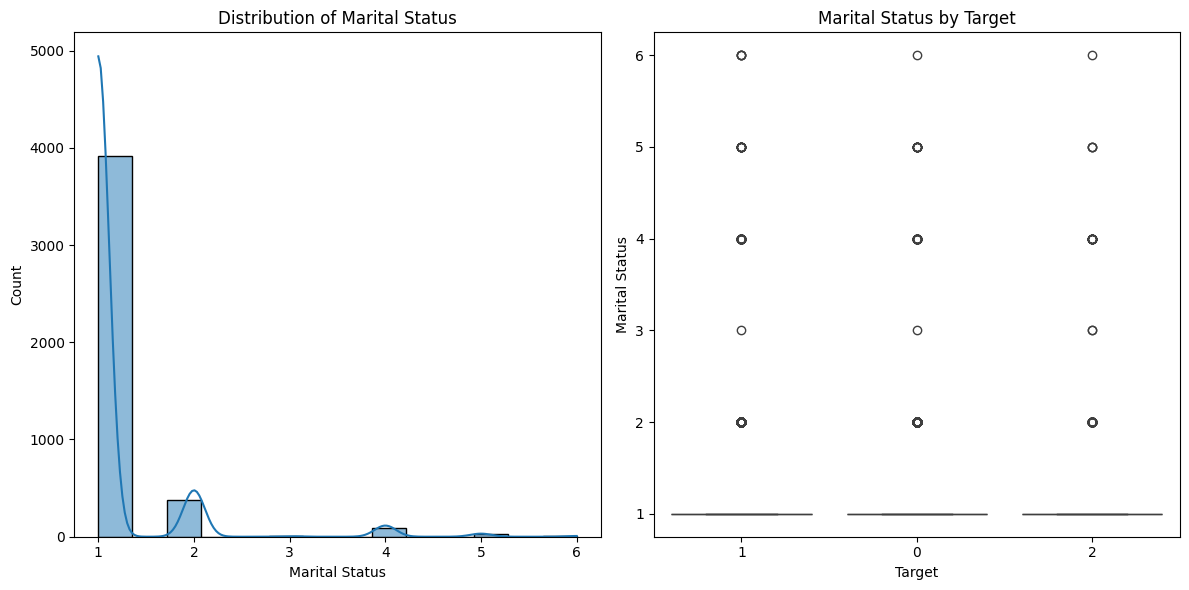

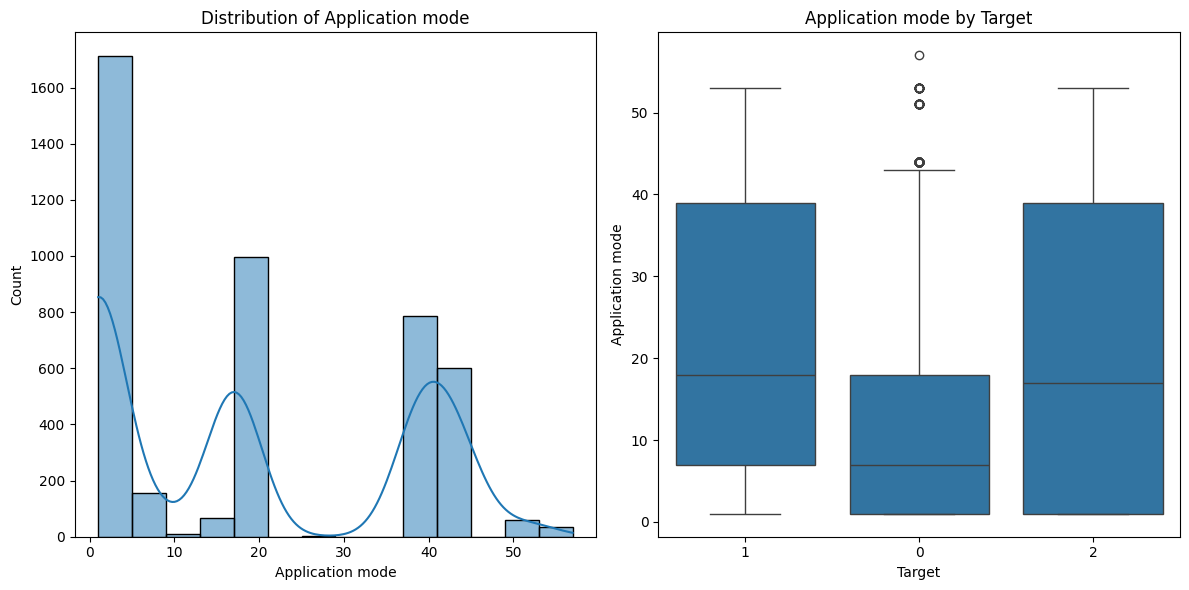

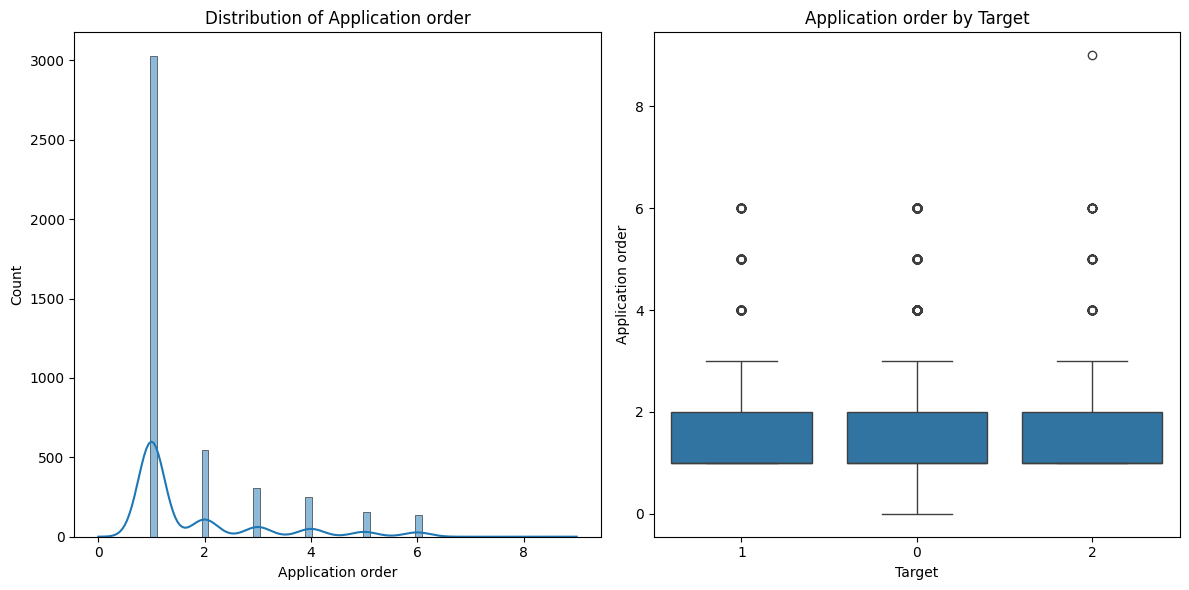

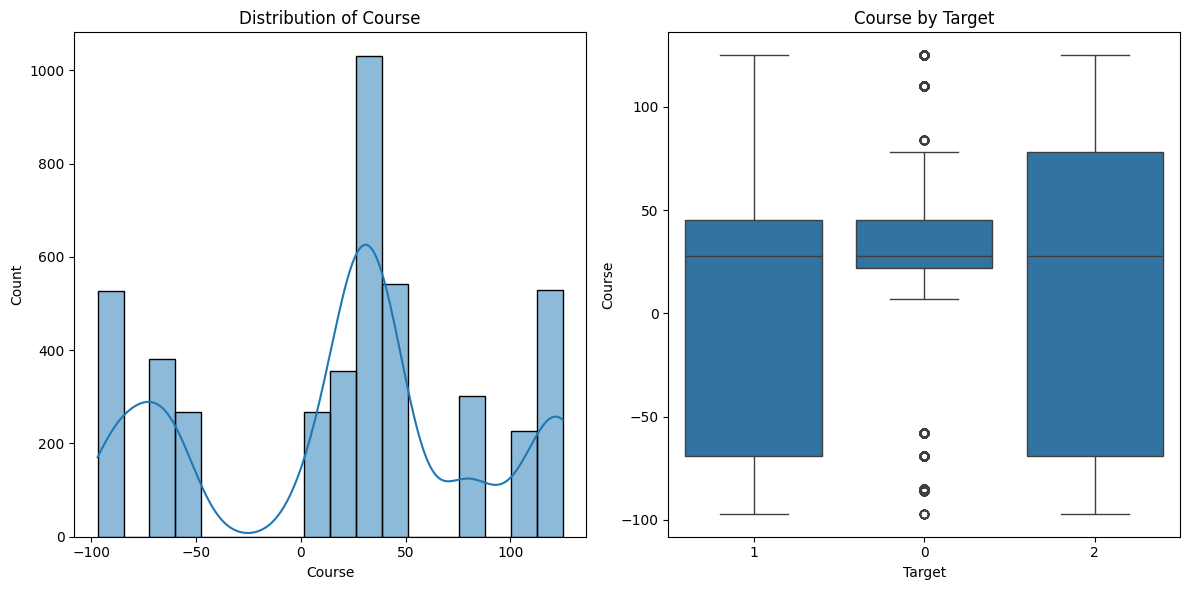

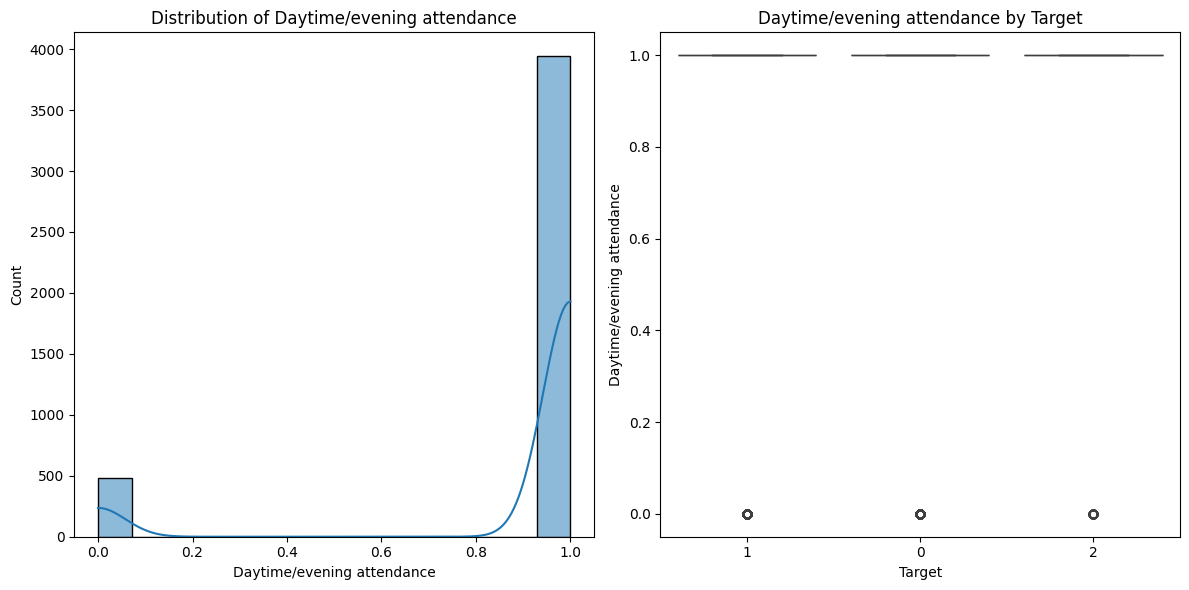

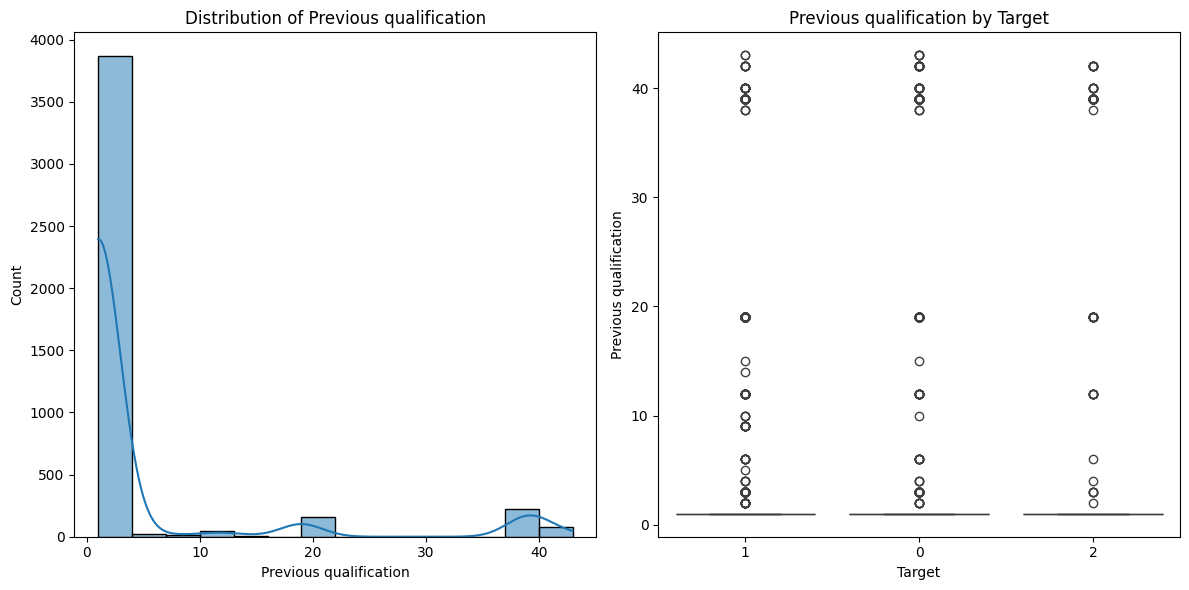

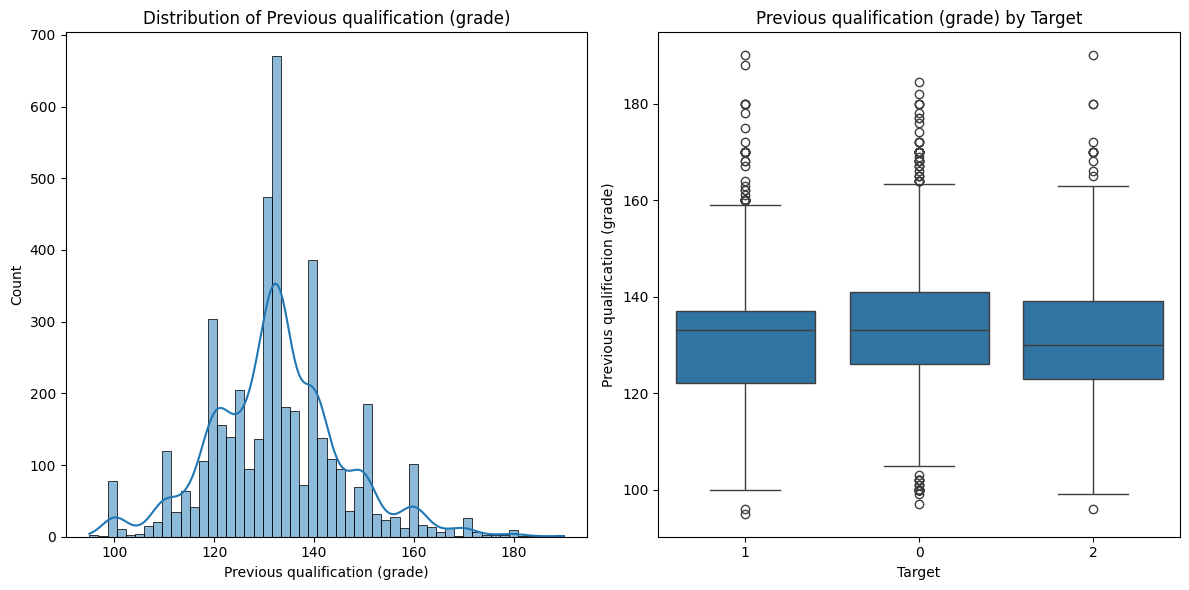

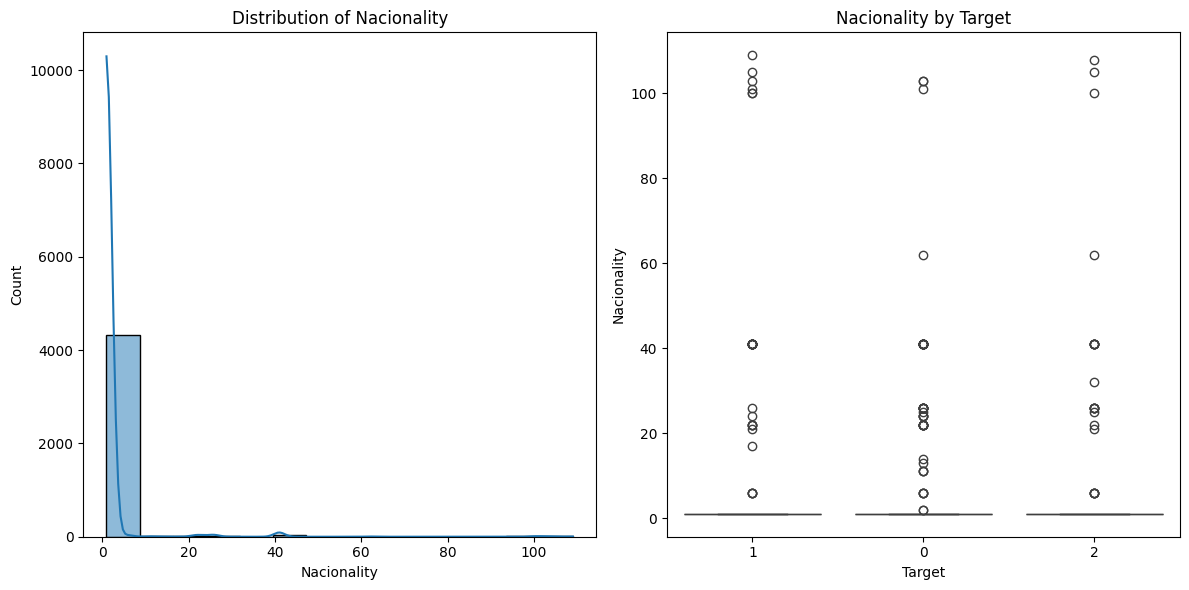

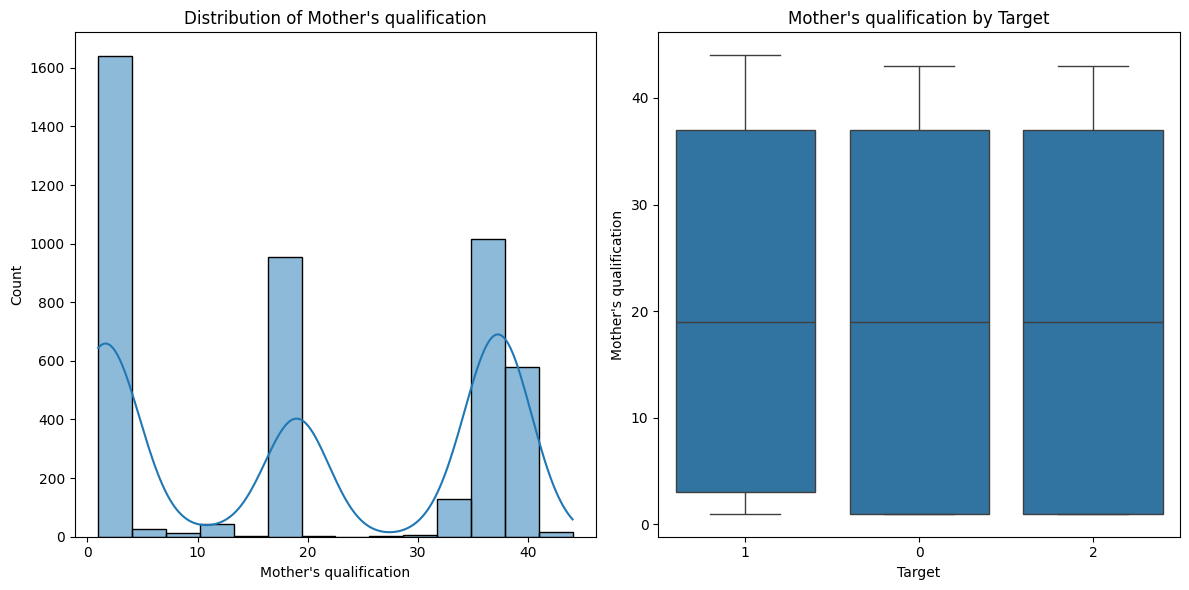

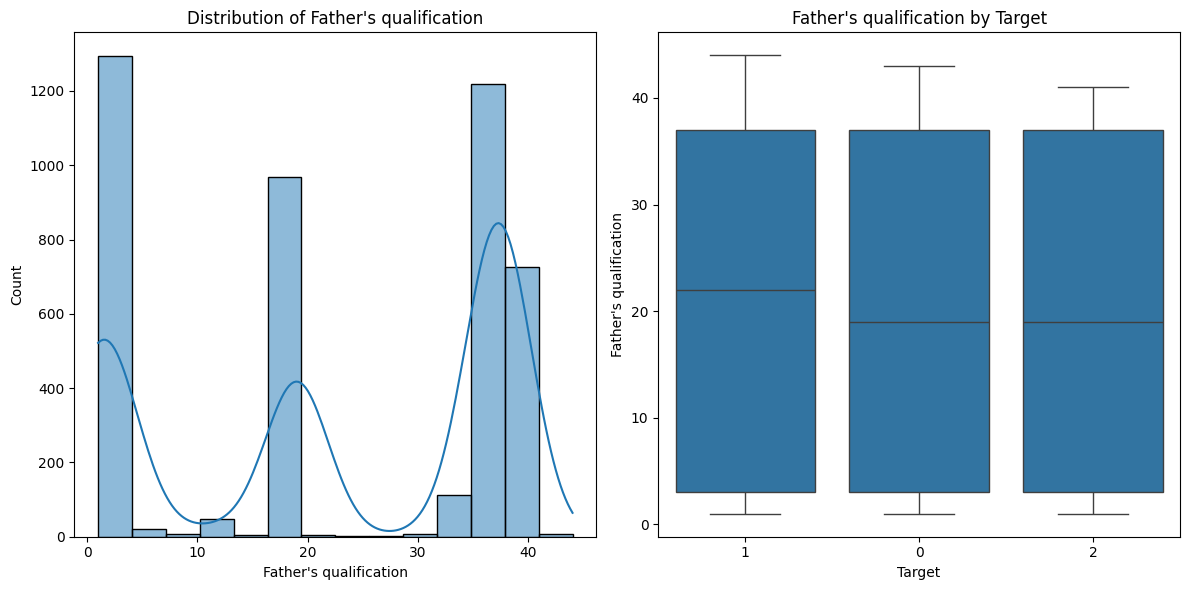

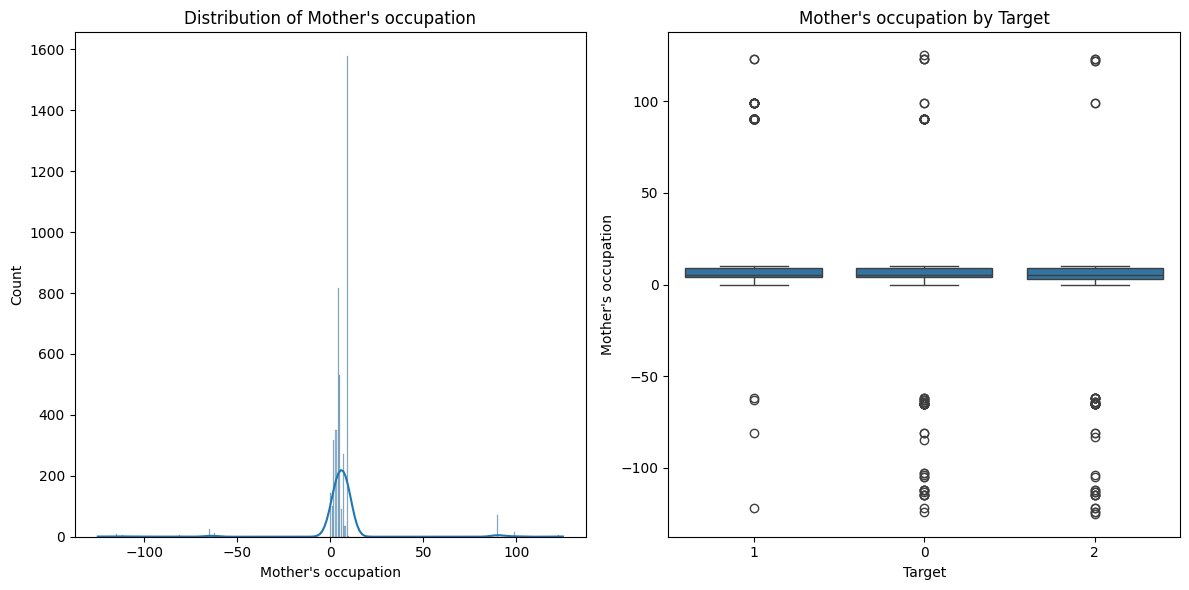

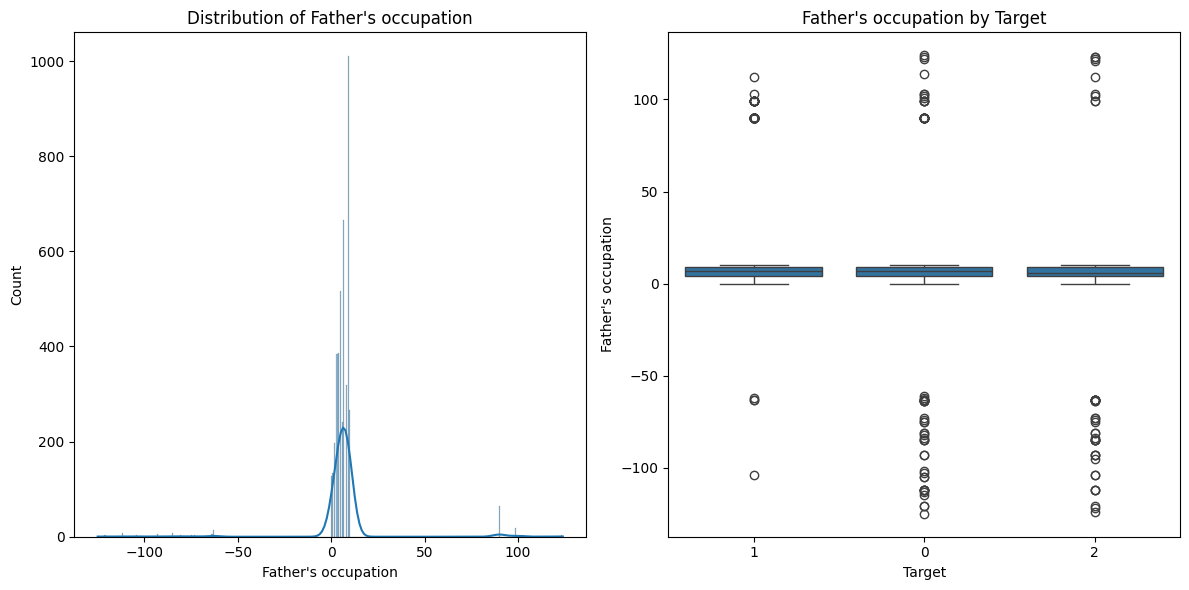

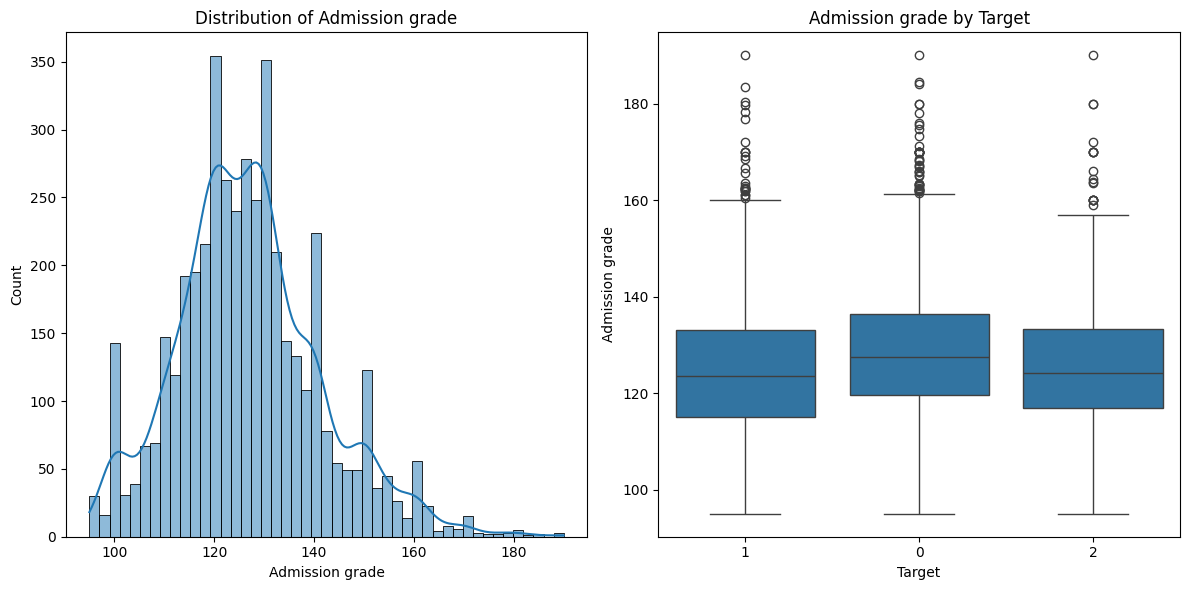

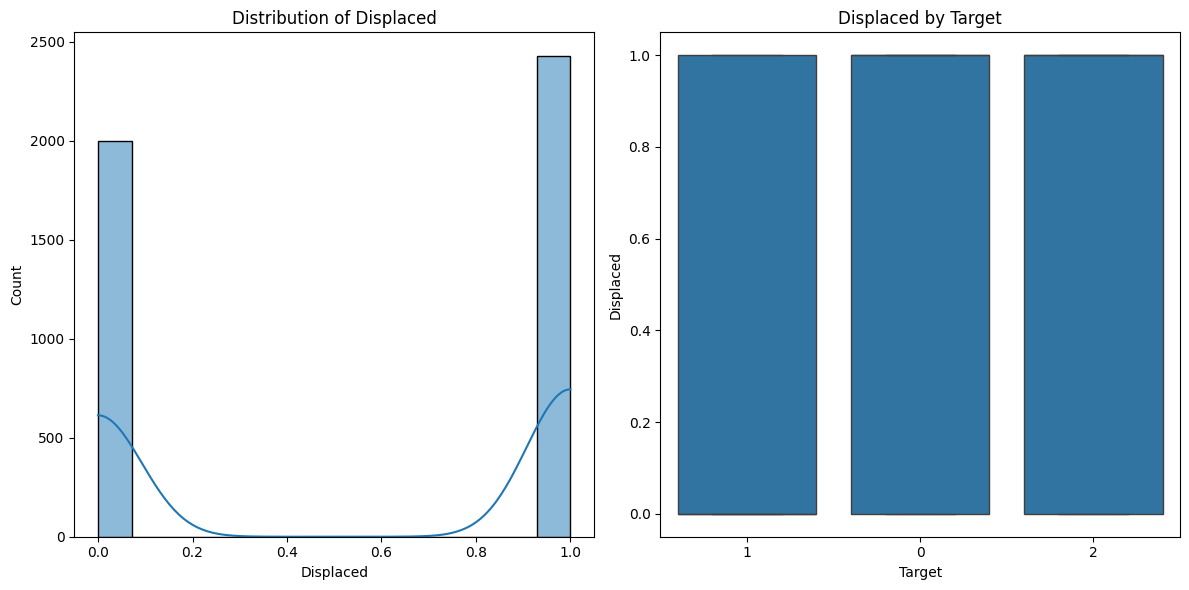

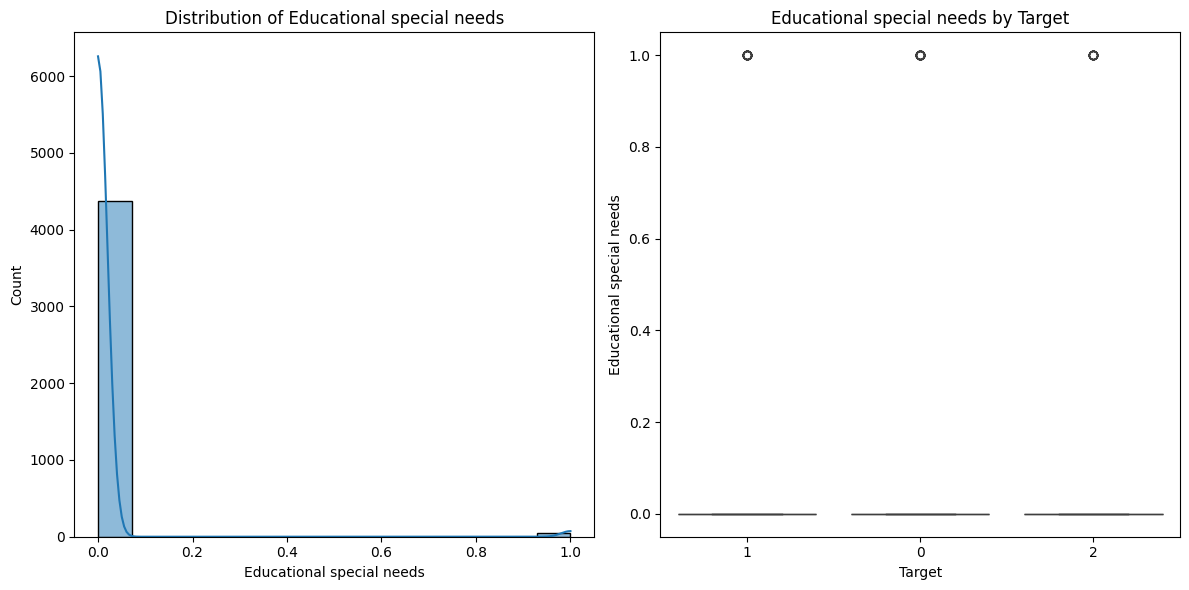

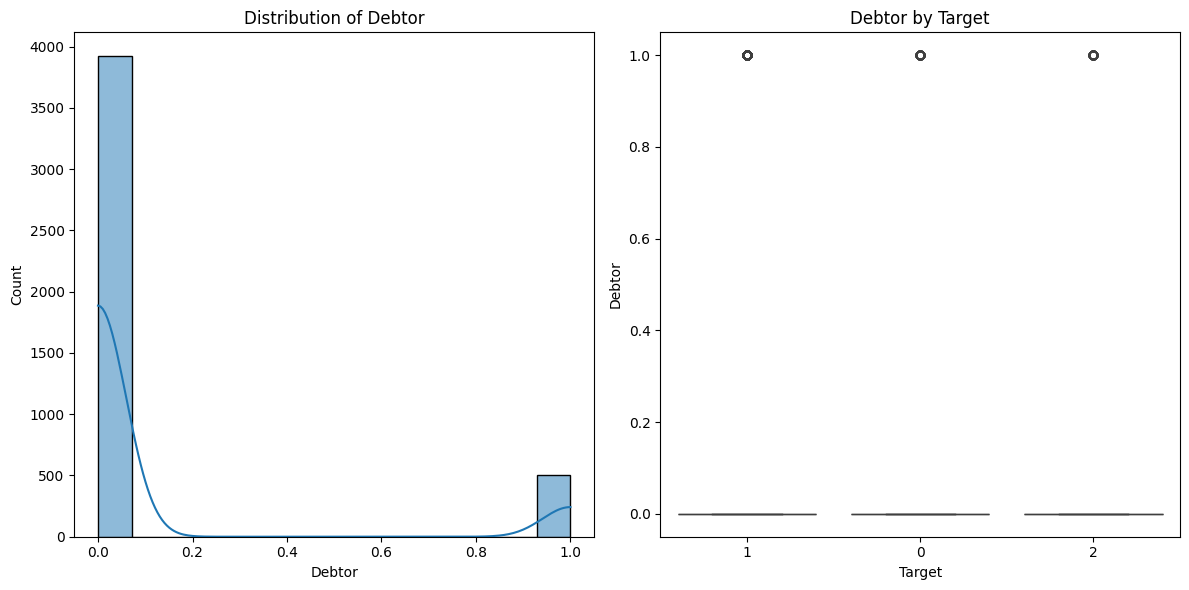

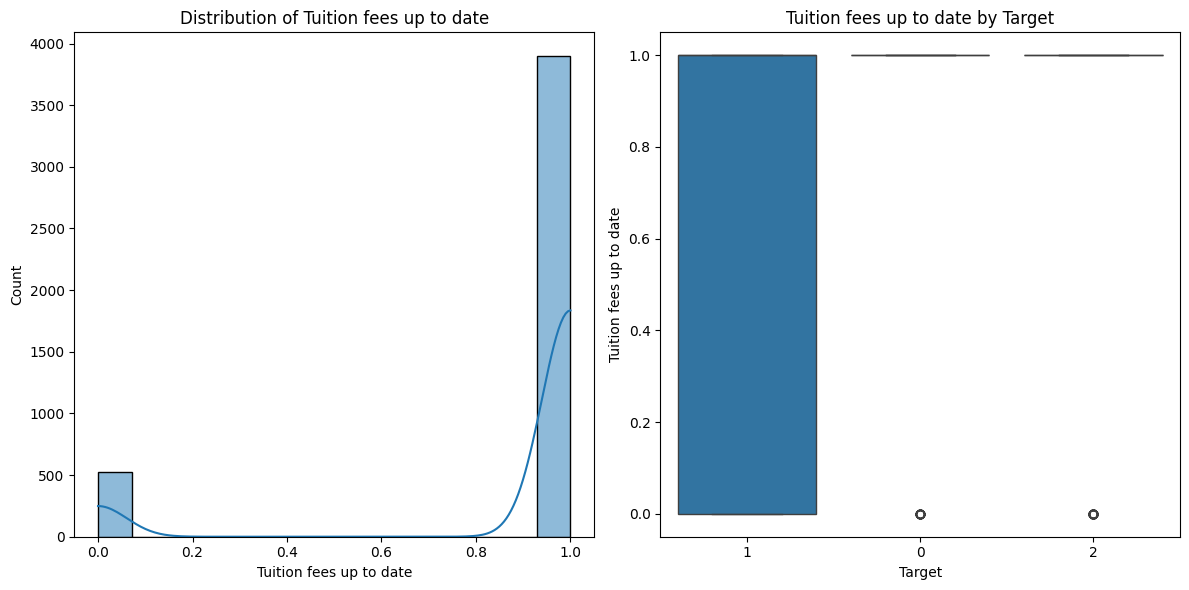

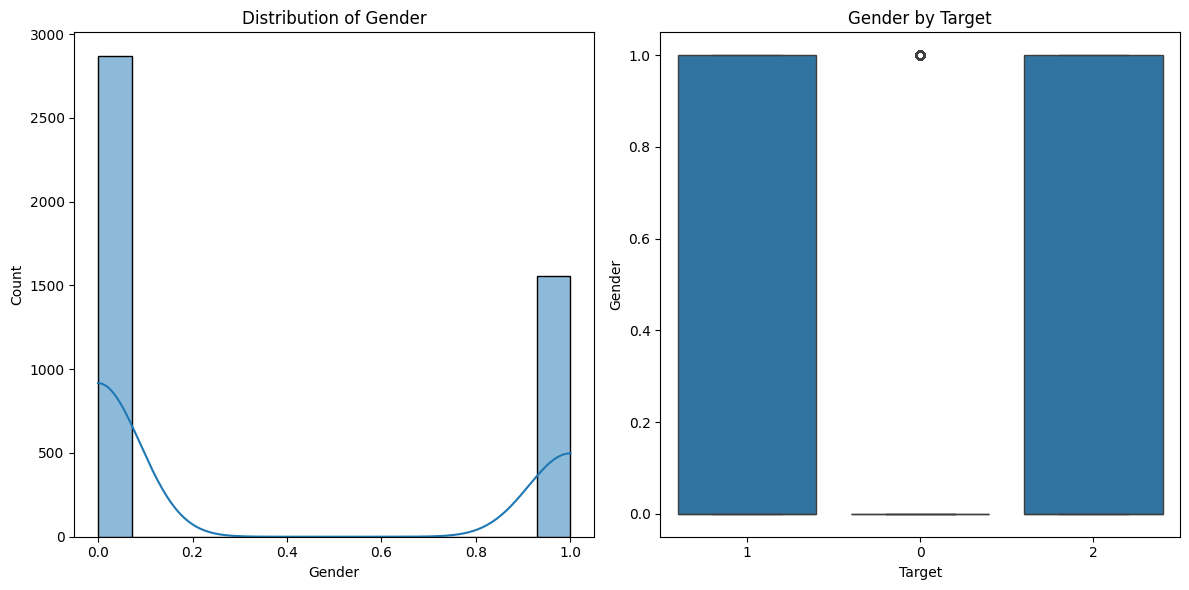

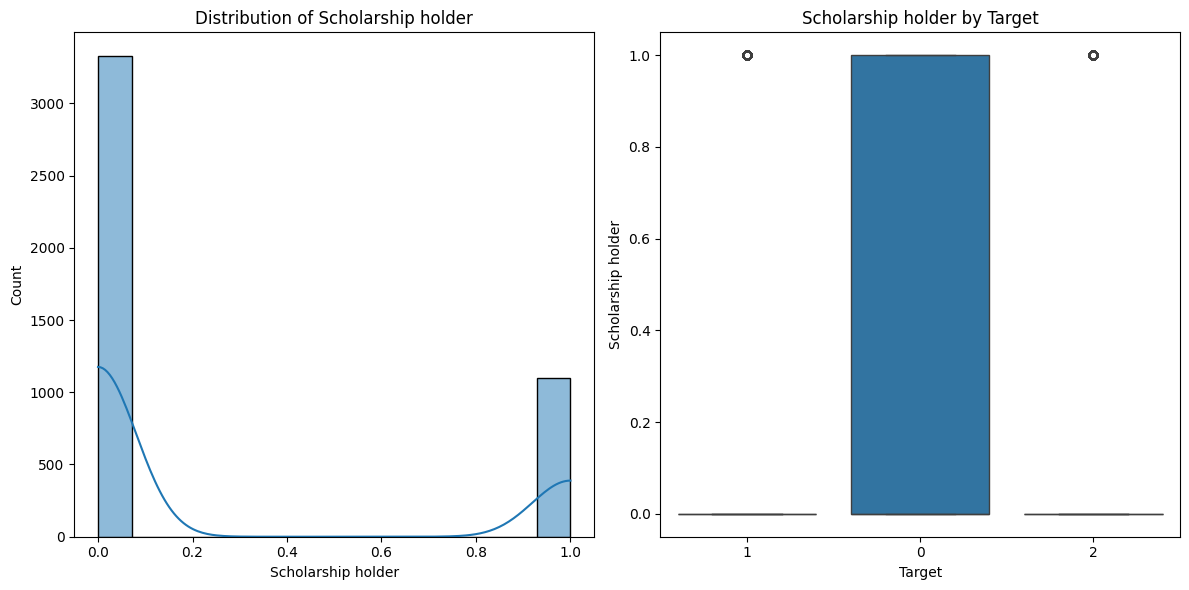

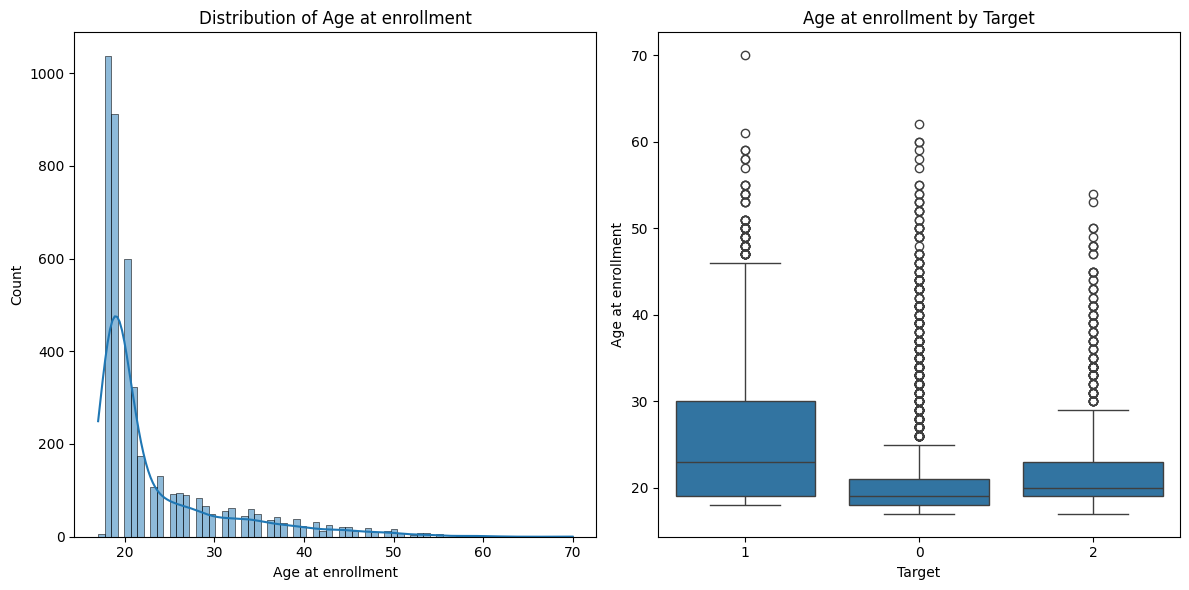

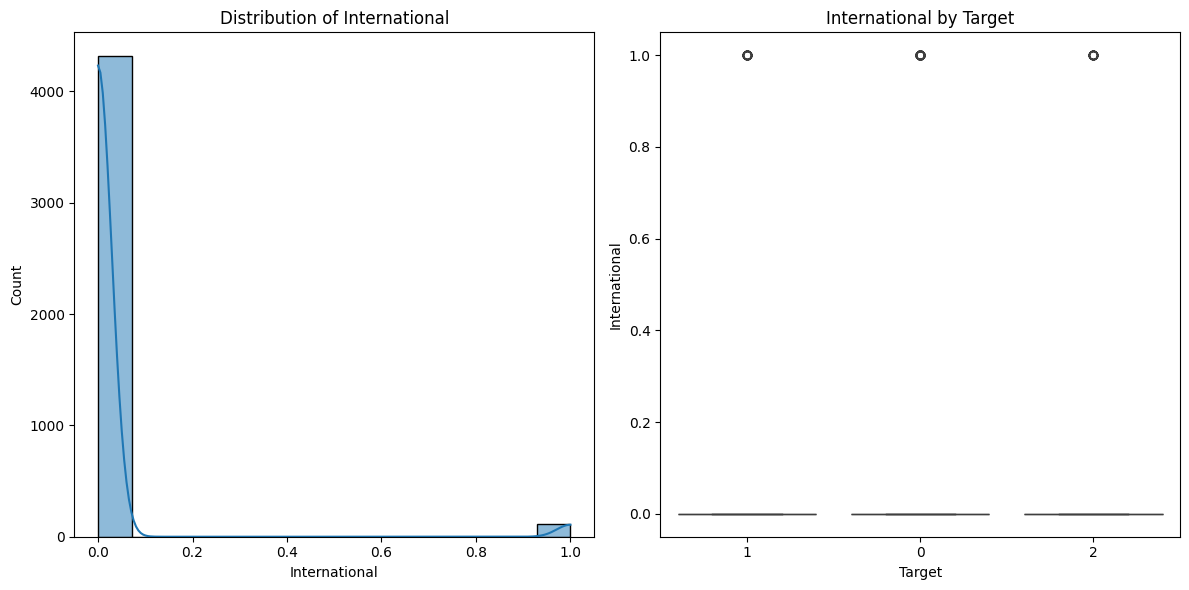

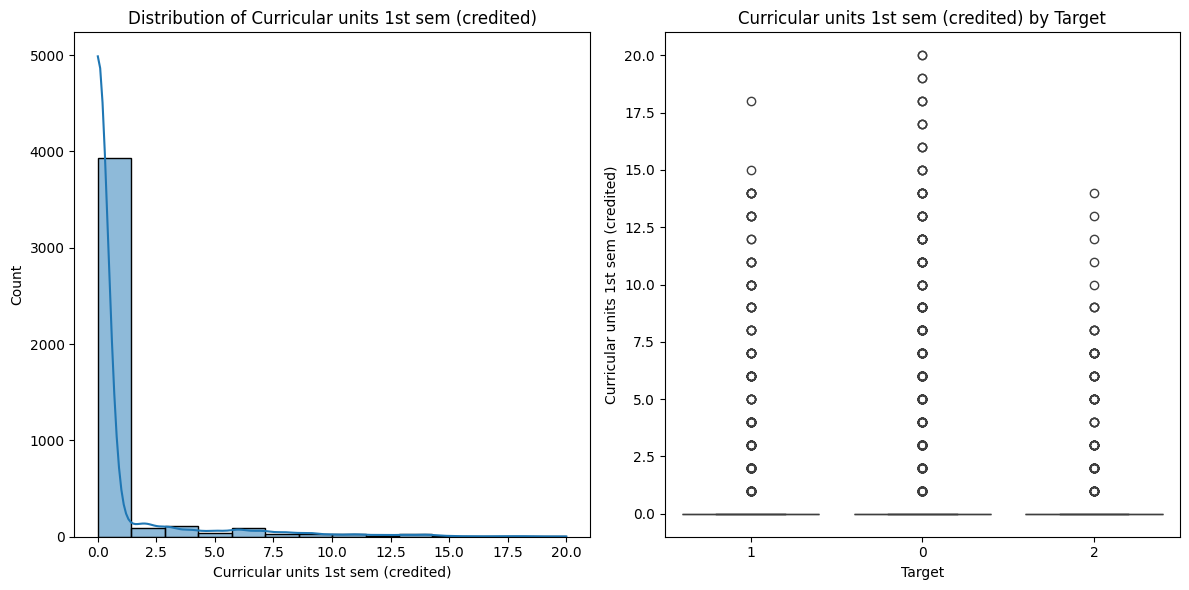

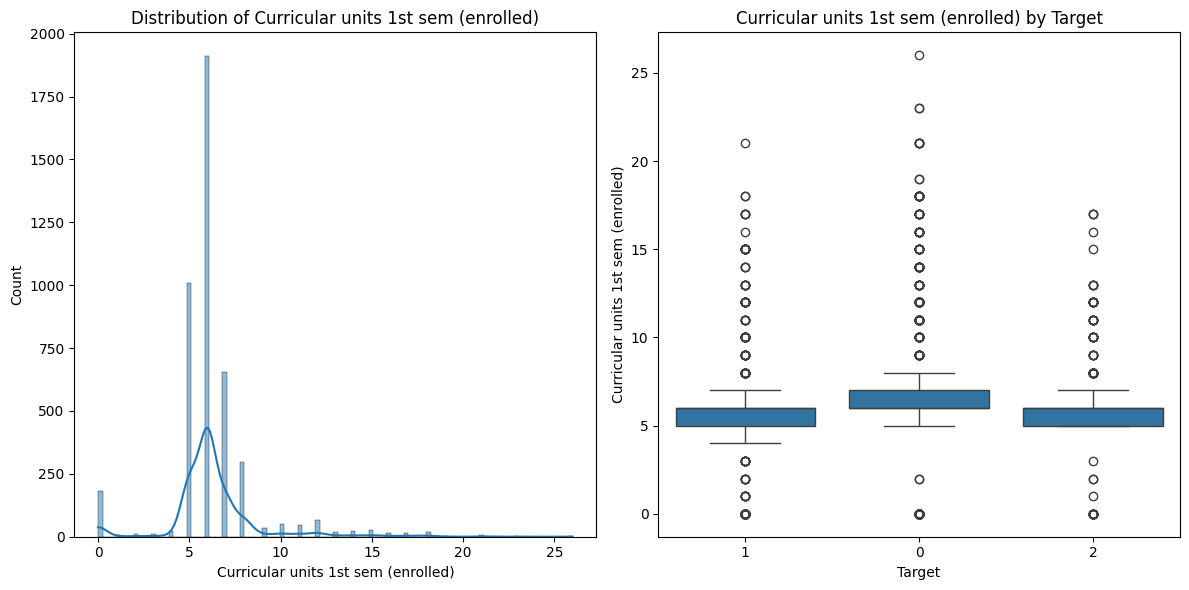

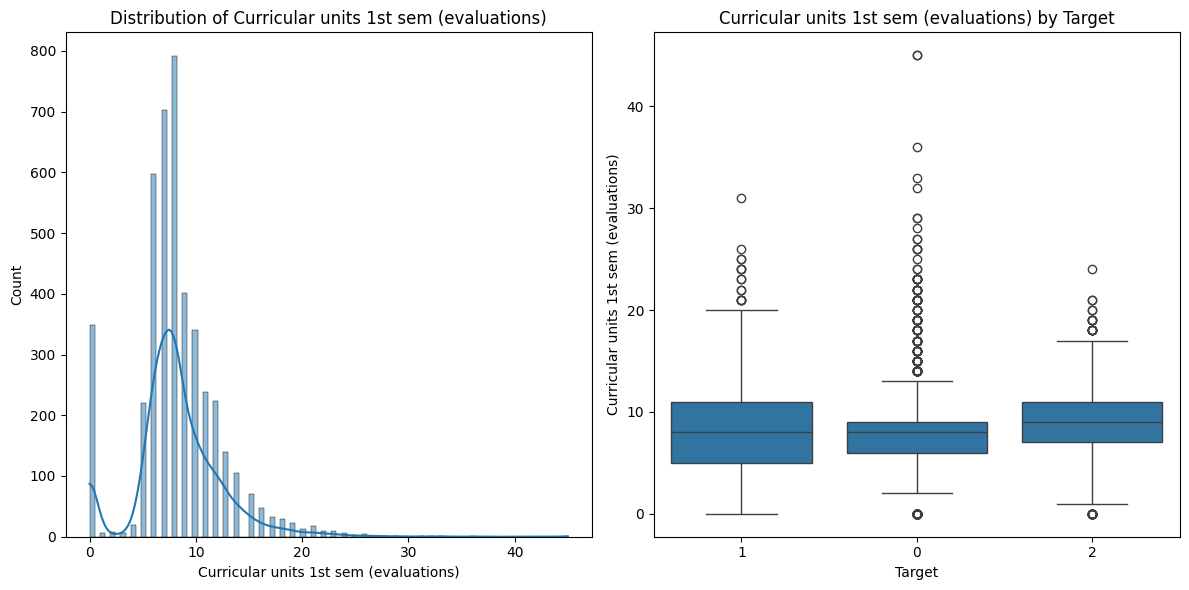

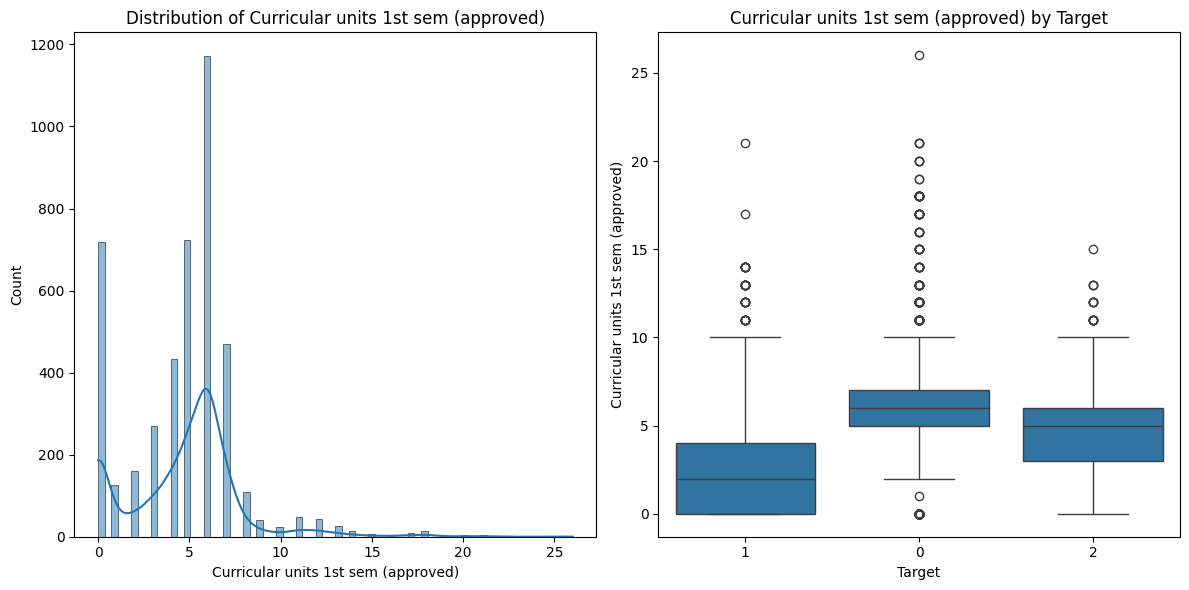

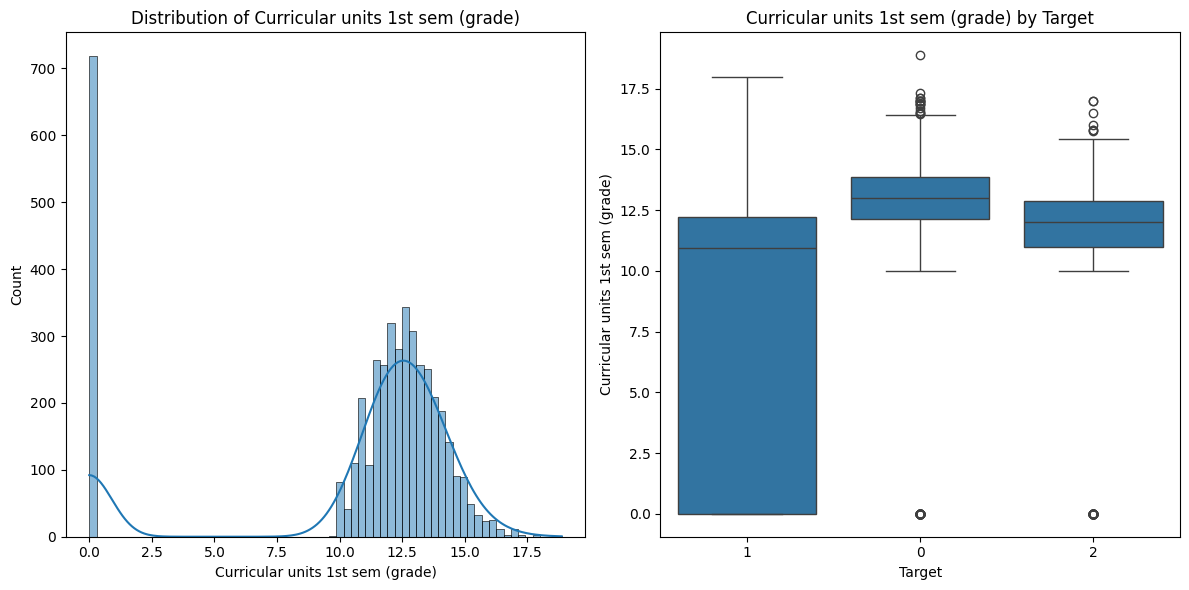

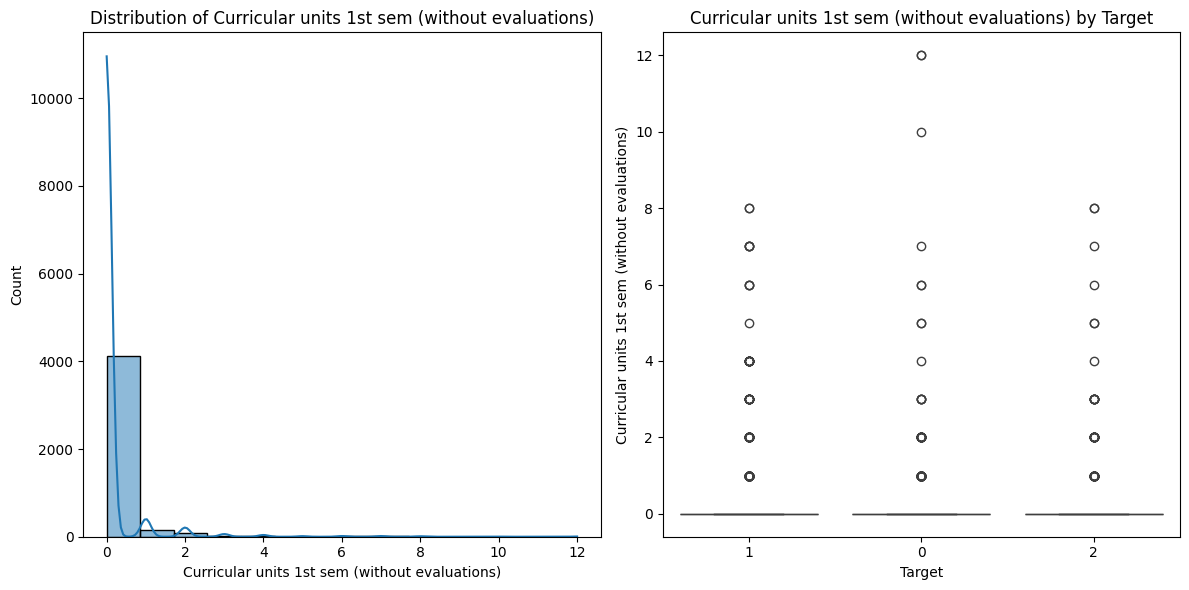

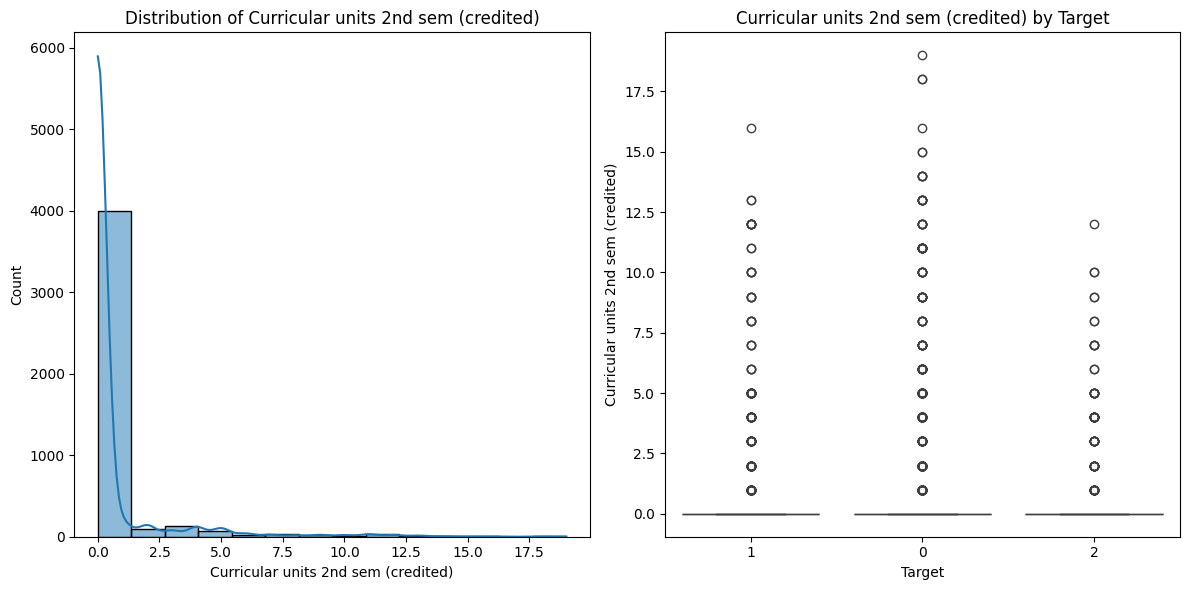

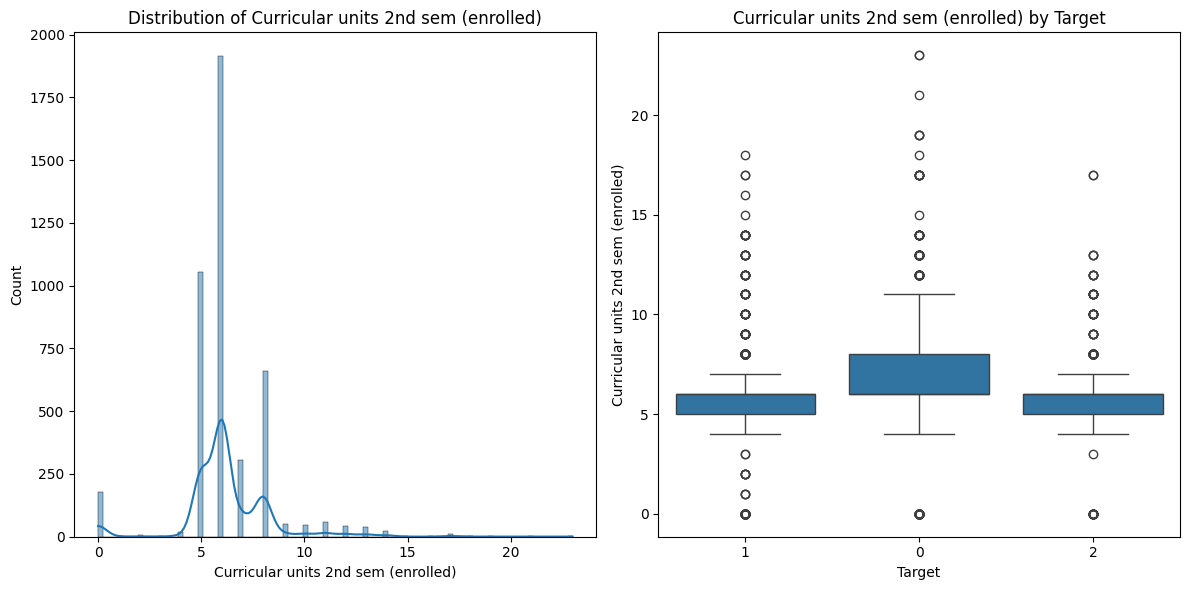

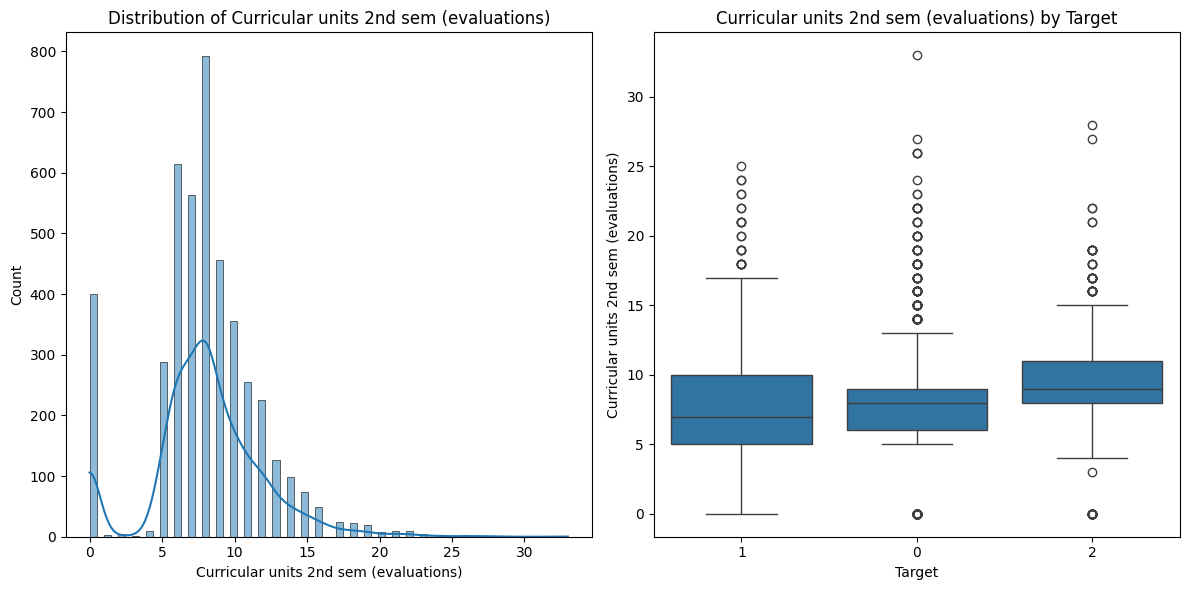

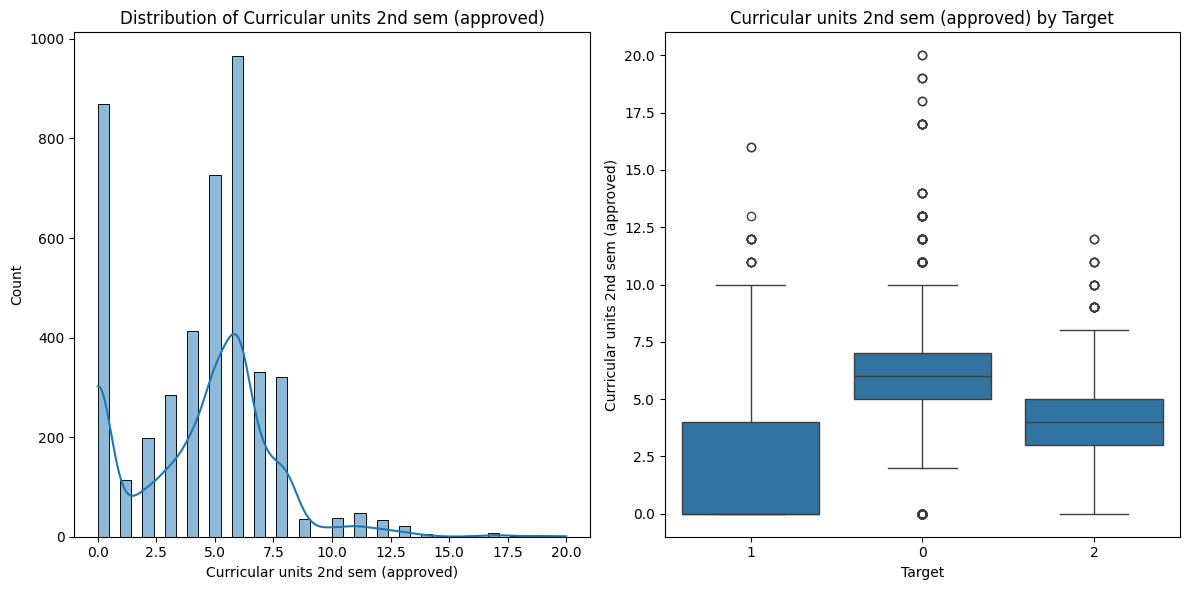

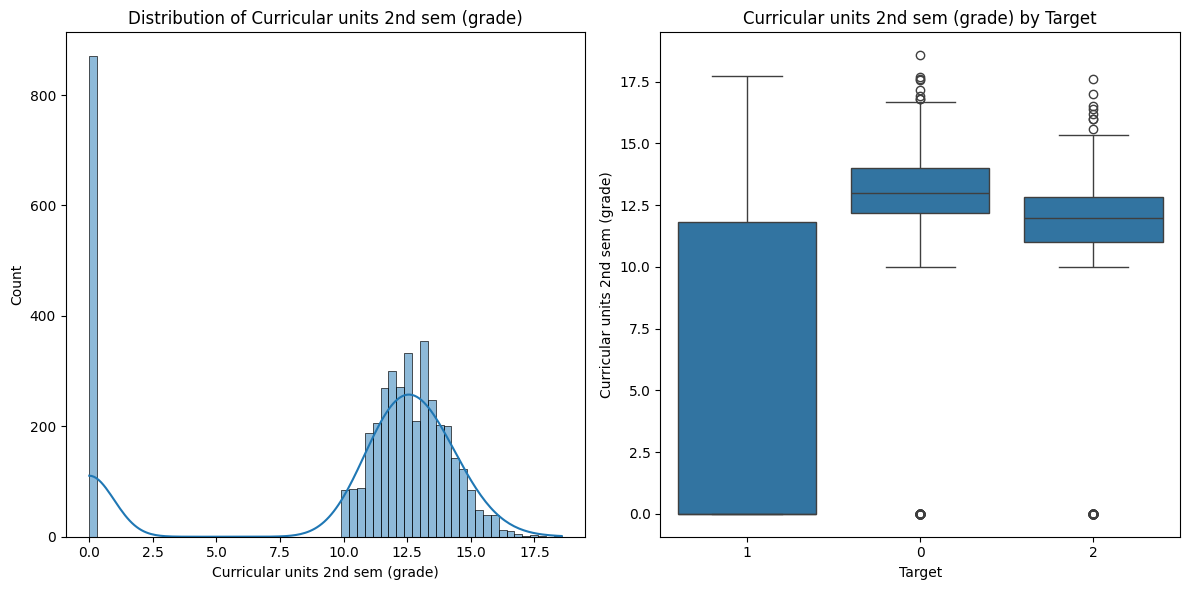

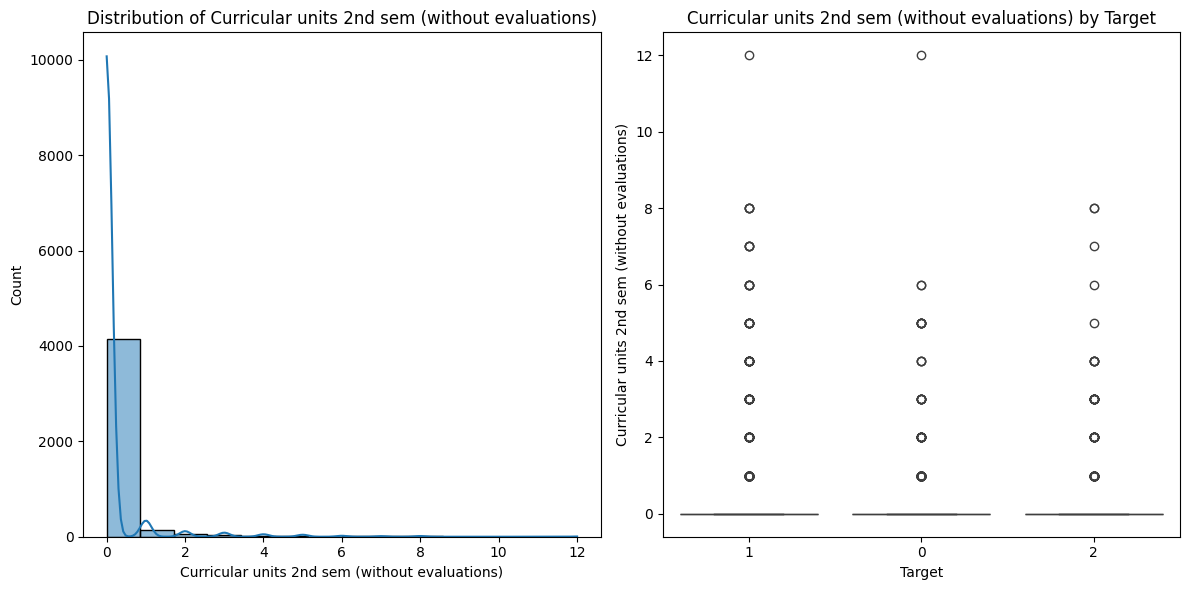

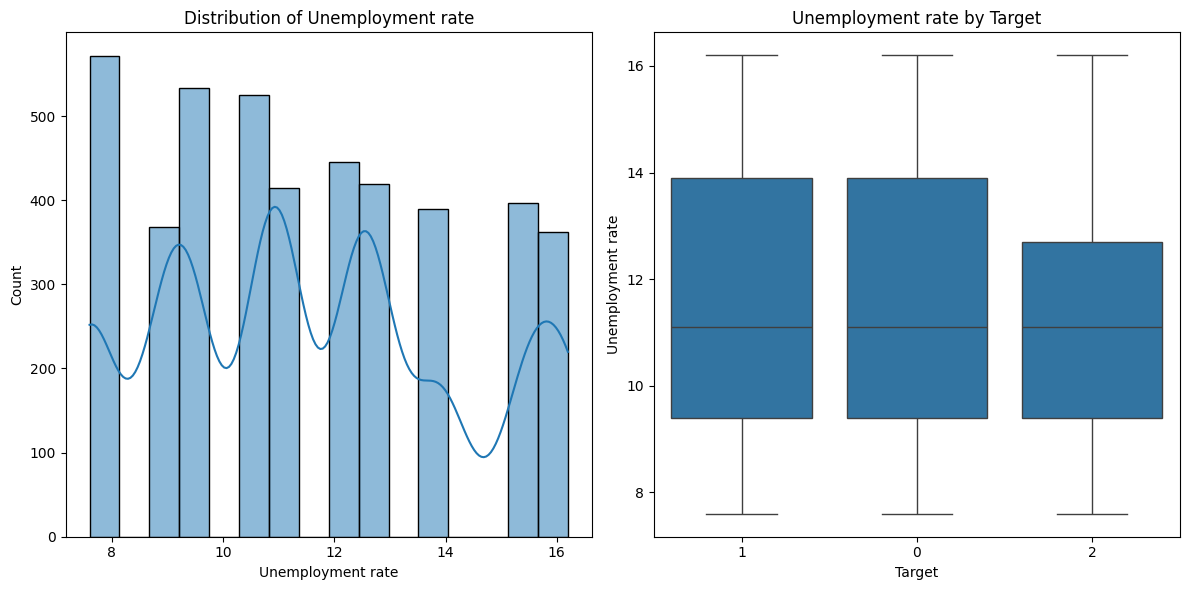

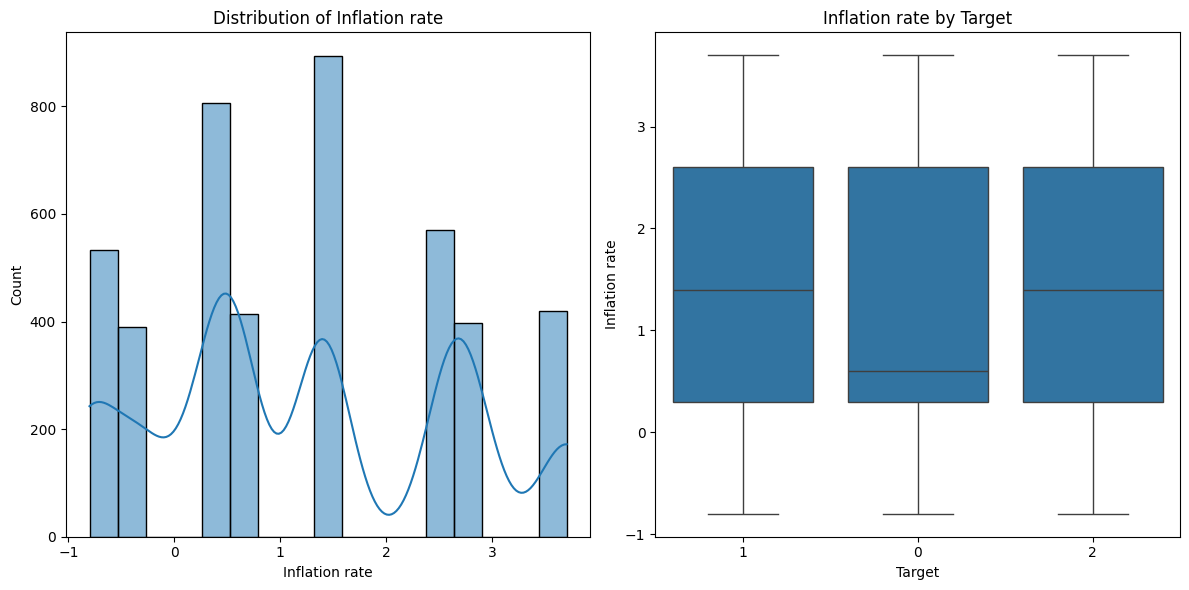

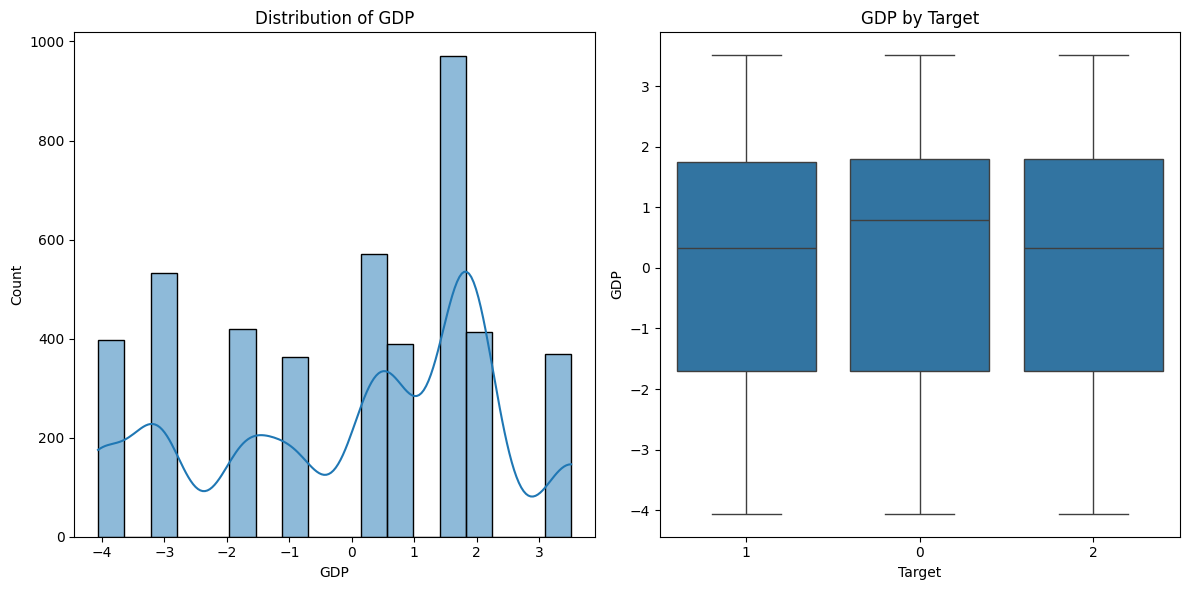

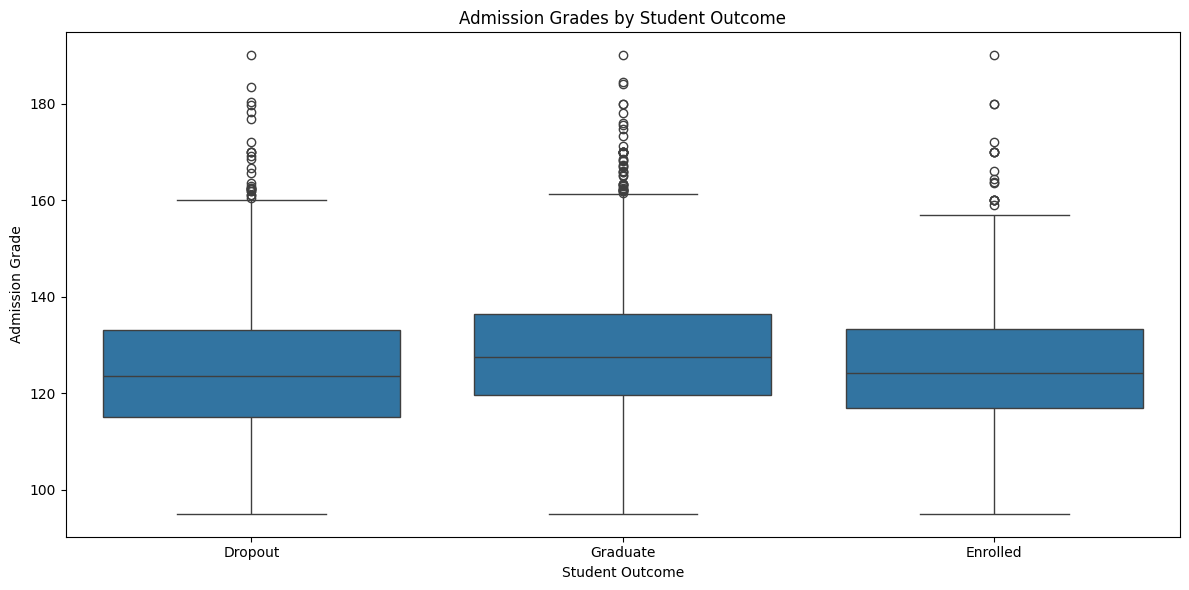

<ipython-input-119-daeb0e33b238>:145: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  semester_means = pd.DataFrame(success_rates).applymap(
ERROR:PerformanceAnalyzer:Error in academic performance analysis: 'float' object is not subscriptable


<Figure size 1200x600 with 0 Axes>

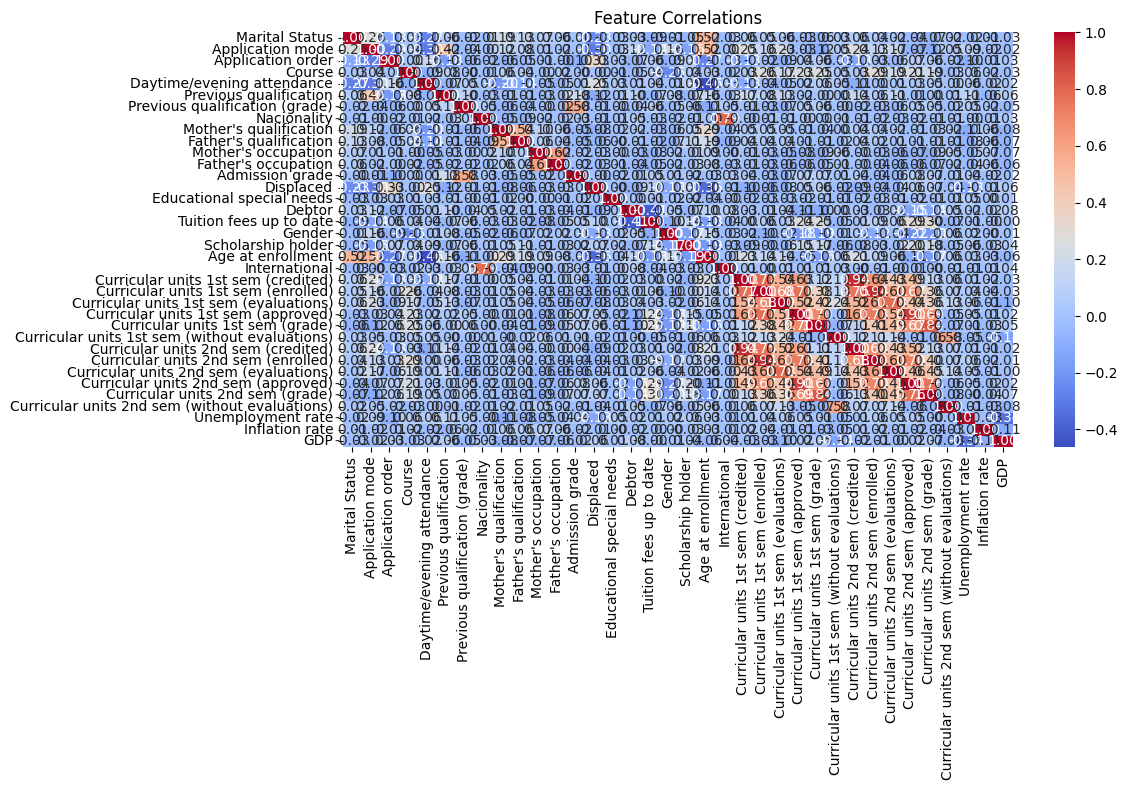

{'feature_distributions': {'Marital Status': {'mean': 1.1785714285714286,
   'median': 1.0,
   'std': 0.60574694613071,
   'skew': 4.399764349657625,
   'kurtosis': 21.482639298823024,
   'quantiles': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0}},
  'Application mode': {'mean': 18.669077757685354,
   'median': 17.0,
   'std': 17.484682291004756,
   'skew': 0.39303572000104375,
   'kurtosis': -1.4538060786233447,
   'quantiles': {0.25: 1.0, 0.5: 17.0, 0.75: 39.0}},
  'Application order': {'mean': 1.7278481012658229,
   'median': 1.0,
   'std': 1.313793078362206,
   'skew': 1.8810499569187527,
   'kurtosis': 2.6512886555471034,
   'quantiles': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0}},
  'Course': {'mean': 20.6498643761302,
   'median': 28.0,
   'std': 67.50641211858184,
   'skew': -0.20058209010713374,
   'kurtosis': -0.8932189232553056,
   'quantiles': {0.25: -58.0, 0.5: 28.0, 0.75: 45.0}},
  'Daytime/evening attendance': {'mean': 0.8908227848101266,
   'median': 1.0,
   'std': 0.3118966814817871,
   'ske

In [ ]:
main()